# **Learn to Build a Polynomial Regression Model from Scratch**

## **Approach**

* Data Preprocessing
  * Outlier removal
  * Imputing null values
  * Onehot encoding
* Model Building
  * Linear regression model building
  * Polynomial regression model building
* Model Evaluation
  * Evaluation of model on test data
  * Discussion on various regression matrix-like R-squared, AIC,
F-statistics

## **Data Dictionary**

* Team: name of the team
* Points_Scored: points scored by the team
* Weightlifting_Sessions_Average: weighlifting sessions on an average done by the team
* Yoga_Sessions_Average: yoga sessions on an average done by the team
* Laps_Run_Per_Practice_Average: laps run on an average by the team
* Water_Intake: total water intake
* Players_Absent_For_Sessions: number of players absent for sessions



In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sys
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## **Data Input**

In [3]:
#reading data
data = pd.read_csv("NBA_Dataset_csv.csv")

In [4]:
#view top 3 entries
data.head()

,Team,Points_Scored,Weightlifting_Sessions_Average,Yoga_Sessions_Average,Laps_Run_Per_Practice_Average,Water_Intake,Players_Absent_For_Sessions
0,Lakers,242,23.0,25.0,30.0,5.0,4.0
1,Lakers,144,24.0,26.0,31.0,5.0,8.0
2,Lakers,156,24.0,27.0,31.0,5.0,7.0
3,Lakers,159,26.0,29.0,34.0,5.0,1.0
4,Lakers,106,27.0,NaN,34.0,5.0,6.0


In [5]:
# shape of the data
print("Dimension of the dataset is= ",data.shape)

Dimension of the dataset is=  (159, 7)


In [6]:
# columns of data
data.columns

Index(['Team', 'Points_Scored', 'Weightlifting_Sessions_Average',
       'Yoga_Sessions_Average', 'Laps_Run_Per_Practice_Average',
       'Water_Intake', 'Players_Absent_For_Sessions'],
      dtype='object')

## **Exploratory Data Analysis**
**It is used to understand data patterns, spot anomalies, check assumptions, etc. The main purpose of EDA is to help look into the data before making any hypothesis about it.**


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Points_Scored,159.0,119.327044,52.354983,0.0,96.5,125.0,151.5,250.0
Weightlifting_Sessions_Average,150.0,7433.120000,90719.720242,8.0,19.0,24.0,33.0,1111111.0
Yoga_Sessions_Average,139.0,21.690647,11.439728,3.0,13.0,19.0,28.0,63.0
Laps_Run_Per_Practice_Average,145.0,30.972414,11.979117,9.0,23.0,29.0,40.0,68.0
Water_Intake,145.0,3.648276,1.804820,1.0,2.0,3.0,5.0,8.0
Players_Absent_For_Sessions,130.0,4.415385,2.202129,1.0,3.0,4.0,6.0,8.0


In [8]:
# info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Team                            159 non-null    object 
 1   Points_Scored                   159 non-null    int64  
 2   Weightlifting_Sessions_Average  150 non-null    float64
 3   Yoga_Sessions_Average           139 non-null    float64
 4   Laps_Run_Per_Practice_Average   145 non-null    float64
 5   Water_Intake                    145 non-null    float64
 6   Players_Absent_For_Sessions     130 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.8+ KB


There are total 159 rows and 7 columns in the NBA Dataset.

Observe that there are a few null values in the dataset.

Learn about Essential basic functionality for pandas dataframe [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes). 



In [9]:
# renaming required columns
df=data.rename(columns={'Points_Scored':'Points','Weightlifting_Sessions_Average':'WL','Yoga_Sessions_Average':'Yoga',
                        'Laps_Run_Per_Practice_Average':'Laps','Water_Intake':'WI',
                        'Players_Absent_For_Sessions':'PAFS'})

In [10]:
# top rows post renaming the columns
df.head()

,Team,Points,WL,Yoga,Laps,WI,PAFS
0,Lakers,242,23.0,25.0,30.0,5.0,4.0
1,Lakers,144,24.0,26.0,31.0,5.0,8.0
2,Lakers,156,24.0,27.0,31.0,5.0,7.0
3,Lakers,159,26.0,29.0,34.0,5.0,1.0
4,Lakers,106,27.0,NaN,34.0,5.0,6.0


In [11]:
numeric_df = df.select_dtypes(include=['number'])

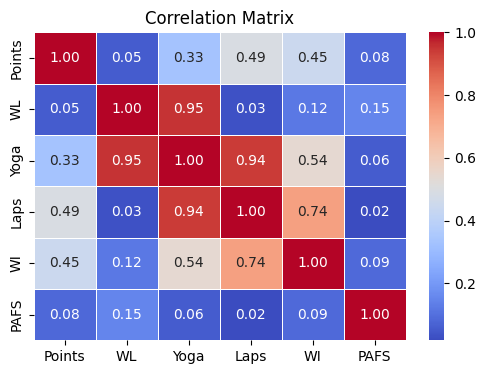

In [12]:
# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### **Distribution Plots**

Distribution plots are graphical representations that show the distribution of a set of numerical data. These plots are used to gain insight into the characteristics of the data, such as the central tendency, spread, and skewness. There are several types of distribution plots, including histograms, density plots, box plots, and violin plots.

* A histogram is a bar graph that represents the frequency distribution of a set of data. It shows how many data points fall into each range of values or bin. The bars in the histogram represent the frequency of data points within a given range, and the height of each bar represents the number of data points in that bin.

* A density plot is a smoothed representation of the distribution of the data, which is calculated by fitting a probability density function to the histogram of the data. It shows the shape of the distribution and provides a visual representation of the relative density of the data at different values.

* A box plot, also known as a box-and-whisker plot, is a graphical representation of the distribution of a set of data. It shows the median, quartiles, and outliers of the data in a compact and easily interpretable format. The box in the plot represents the interquartile range (IQR), which is the range between the first and third quartile. The whiskers extend from the box to the minimum and maximum values of the data, and any outliers are plotted as individual points outside the whiskers.

* A violin plot is a combination of a density plot and a box plot, showing the density of the data along the y-axis and the distribution along the x-axis. It shows the distribution of the data in a compact format, and provides information on the central tendency, spread, and skewness of the data.

* Distribution plots are an important tool for exploratory data analysis and can help in understanding the distribution of the data, identifying patterns and outliers, and making informed decisions about the data. They provide a visual representation of the data and can be used to identify potential issues with the data, such as non-normality or outliers.

Text(0.5, 1.0, 'Distribution Plot for Points')

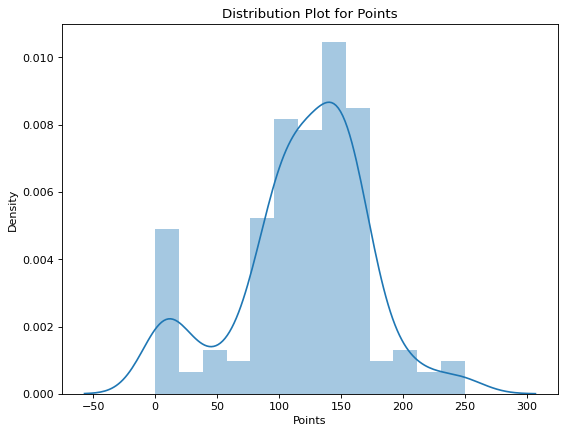

In [13]:
#DistPlot
figure(figsize=(8, 6), dpi=80)
ax=sns.distplot(df.Points)
plt.xlabel("Points")
plt.ylabel("Density")
plt.title("Distribution Plot for Points")

Text(0.5, 1.0, 'Distribution Plot for Square Root of Points')

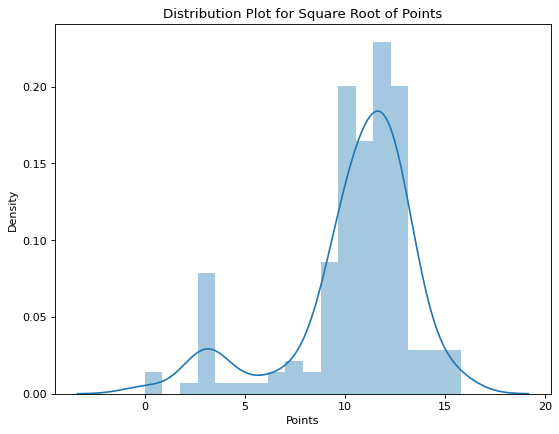

In [16]:
#distplot can be replaced with displot
figure(figsize=(8, 6), dpi=80)
ax=sns.distplot(np.sqrt(df.Points))
plt.xlabel("Points")
plt.ylabel("Density")
plt.title("Distribution Plot for Square Root of Points")

Text(0.5, 1.0, 'Box Plot for Points')

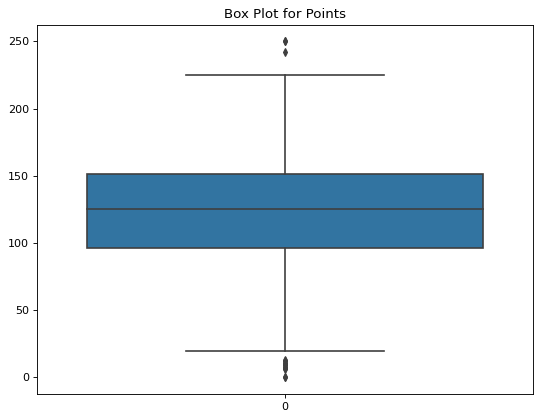

In [17]:
#boxplot visualization
figure(figsize=(8, 6), dpi=80)
sns.boxplot(df.Points)
plt.title("Box Plot for Points")

In [19]:
df.tail(5)

,Team,Points,WL,Yoga,Laps,WI,PAFS
154,Bulls,12,12.0,12.0,13.0,1.0,NaN
155,Bulls,13,12.0,12.0,14.0,1.0,NaN
156,Bulls,12,12.0,13.0,14.0,1.0,NaN
157,Bulls,20,13.0,14.0,15.0,1.0,6.0
158,Bulls,0,14.0,15.0,16.0,1.0,5.0


In [20]:
#function for plotting violin plots
def plotting_box_violin_plots(df,x,y):

  fig,axes=plt.subplots(1,2,figsize=(18,10))
  fig.suptitle("Violin and box plots for variable : {}".format(y))

  sns.violinplot(ax=axes[0],x=x,y=y,data=df)
  sns.boxplot(ax=axes[1],data=df[y])

  axes[0].set_title("Violin plot for variable : {}".format(y))
  axes[1].set_title("Box plot for variable : {}".format(y))

In [21]:
df.columns

Index(['Team', 'Points', 'WL', 'Yoga', 'Laps', 'WI', 'PAFS'], dtype='object')

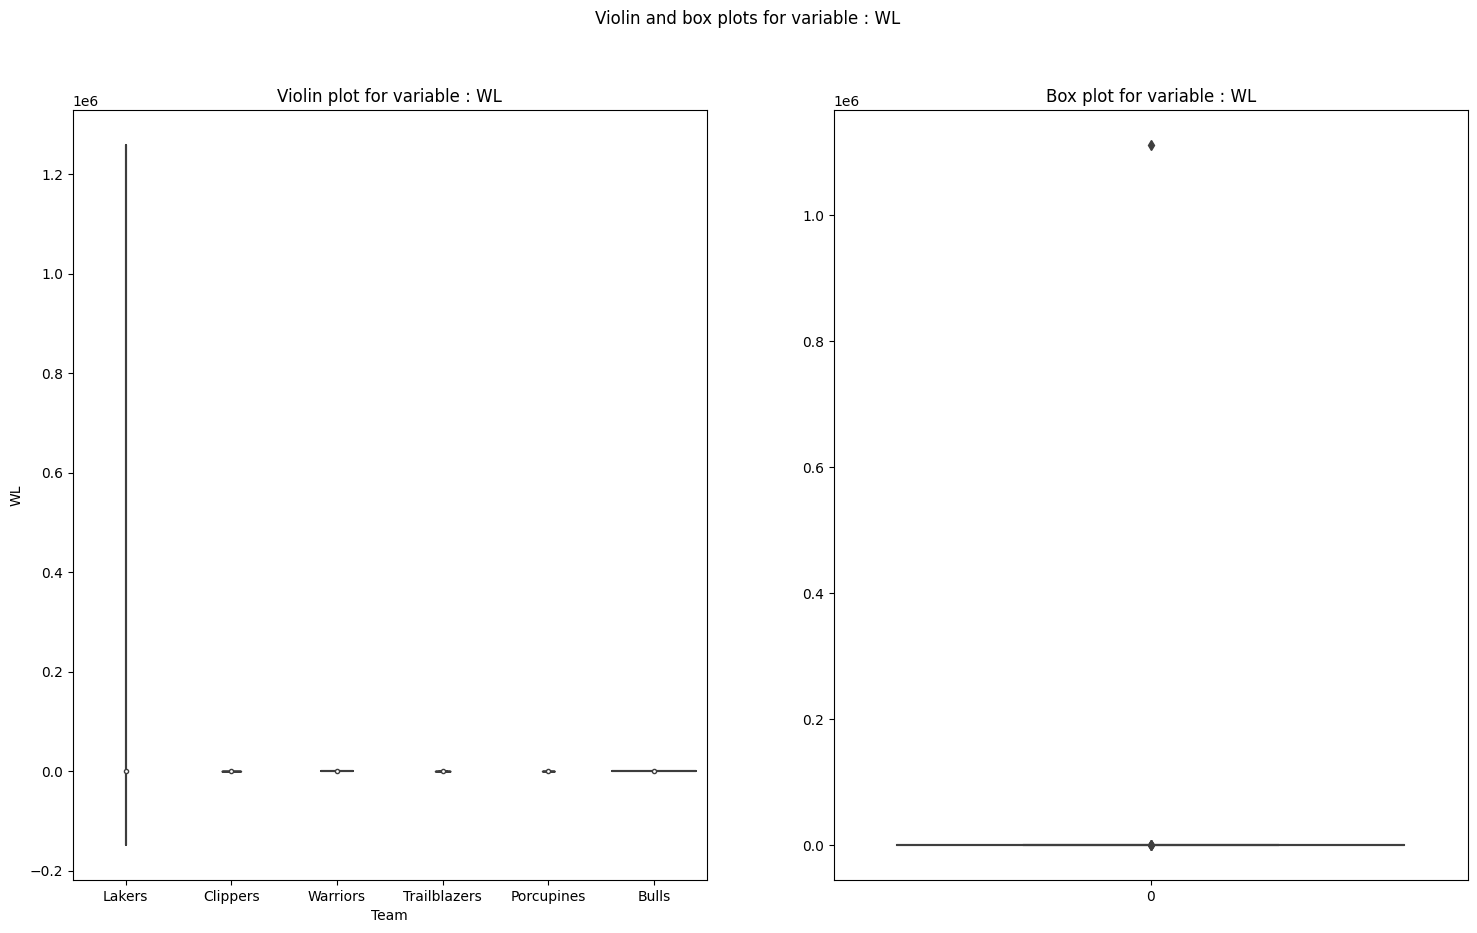

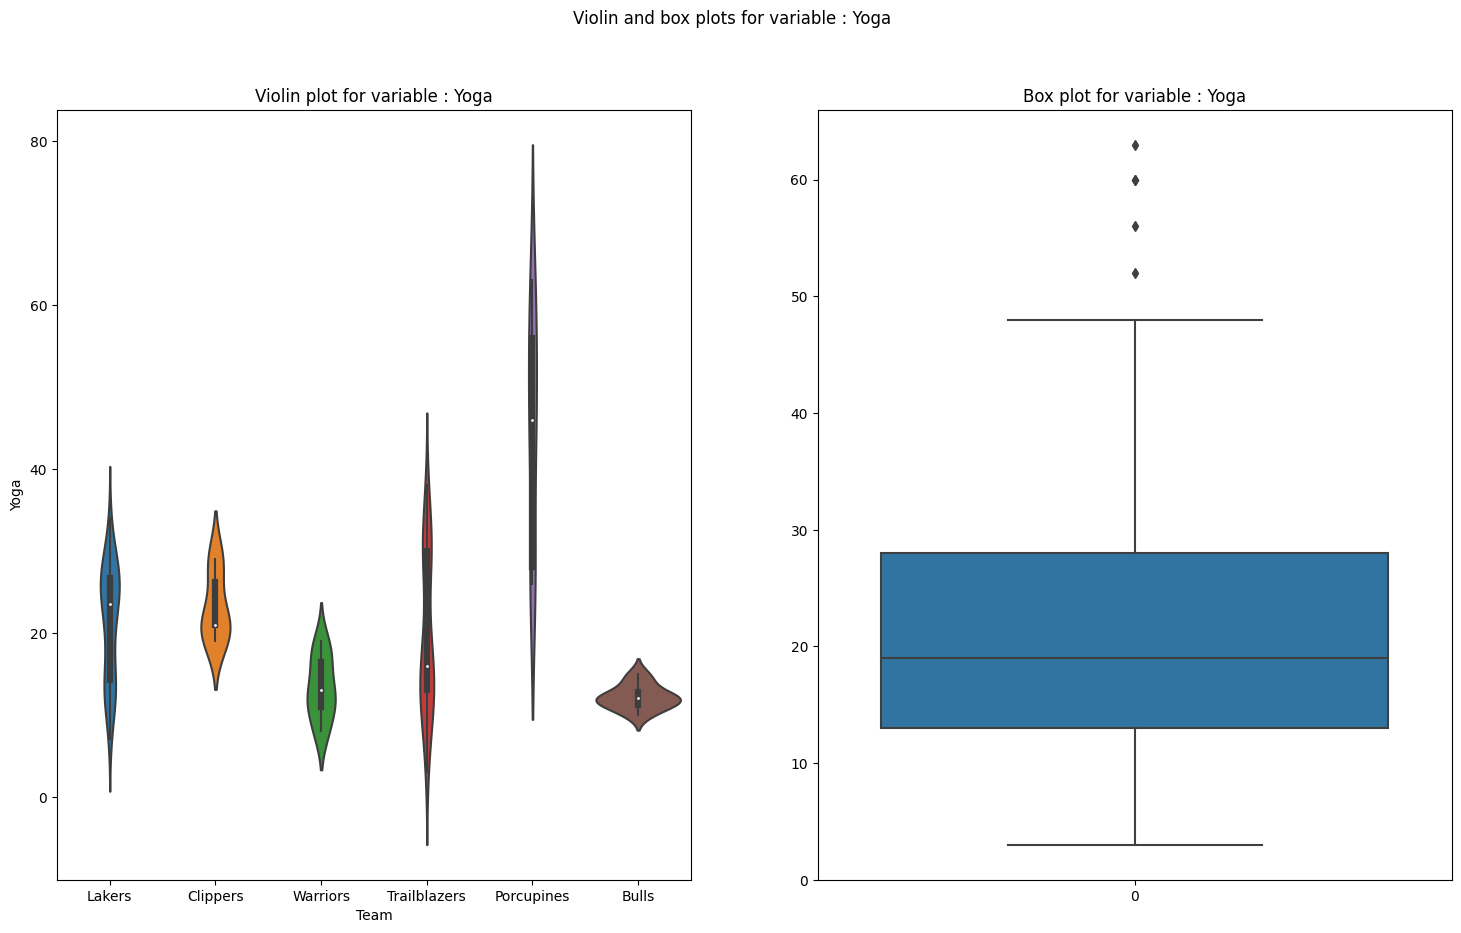

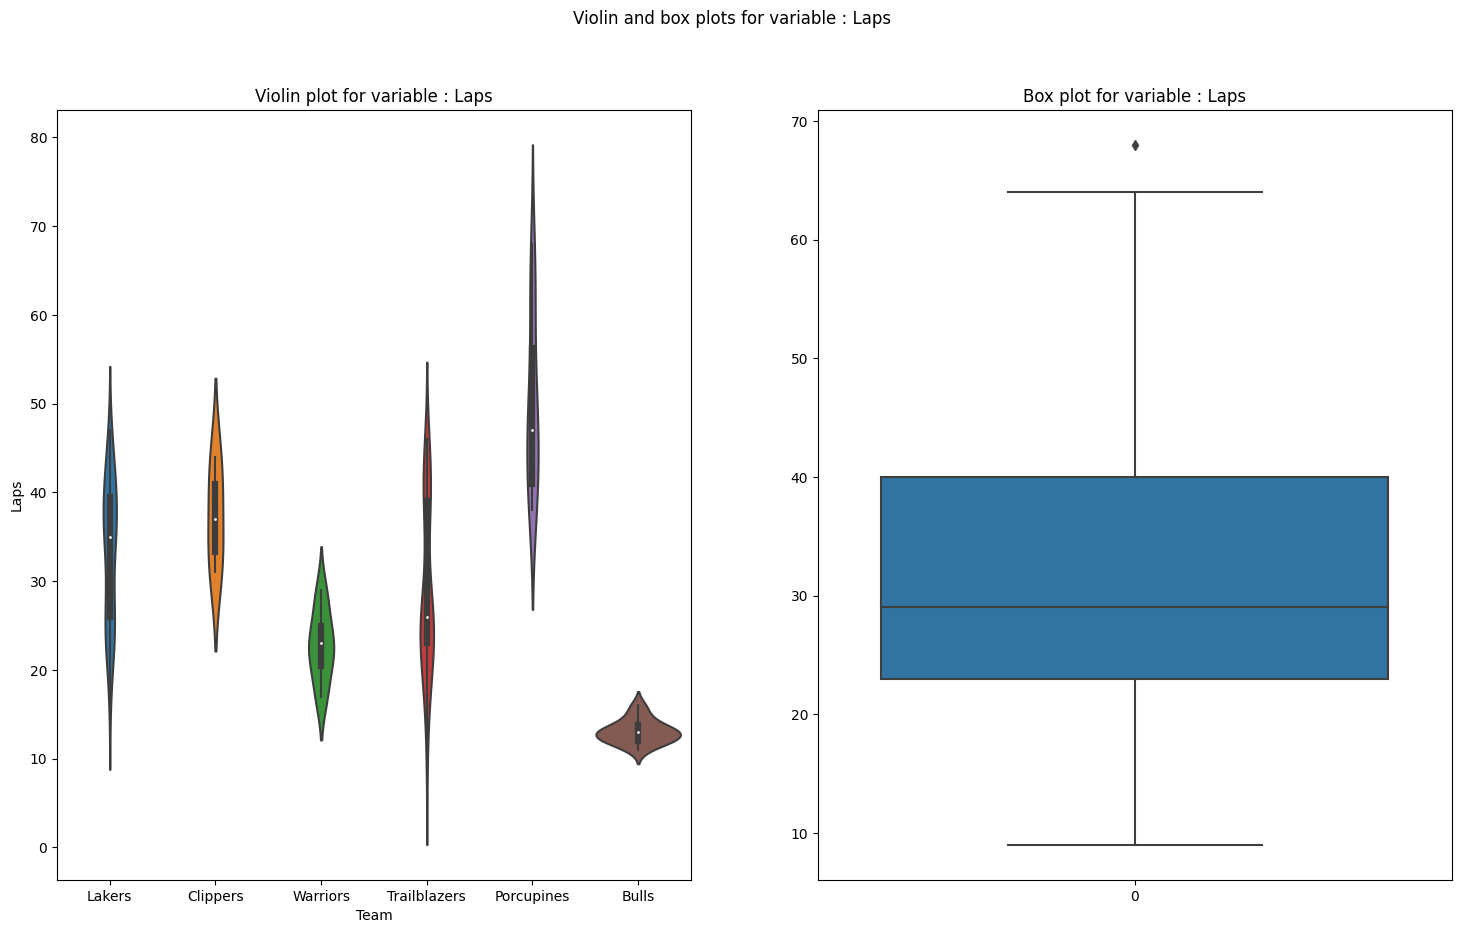

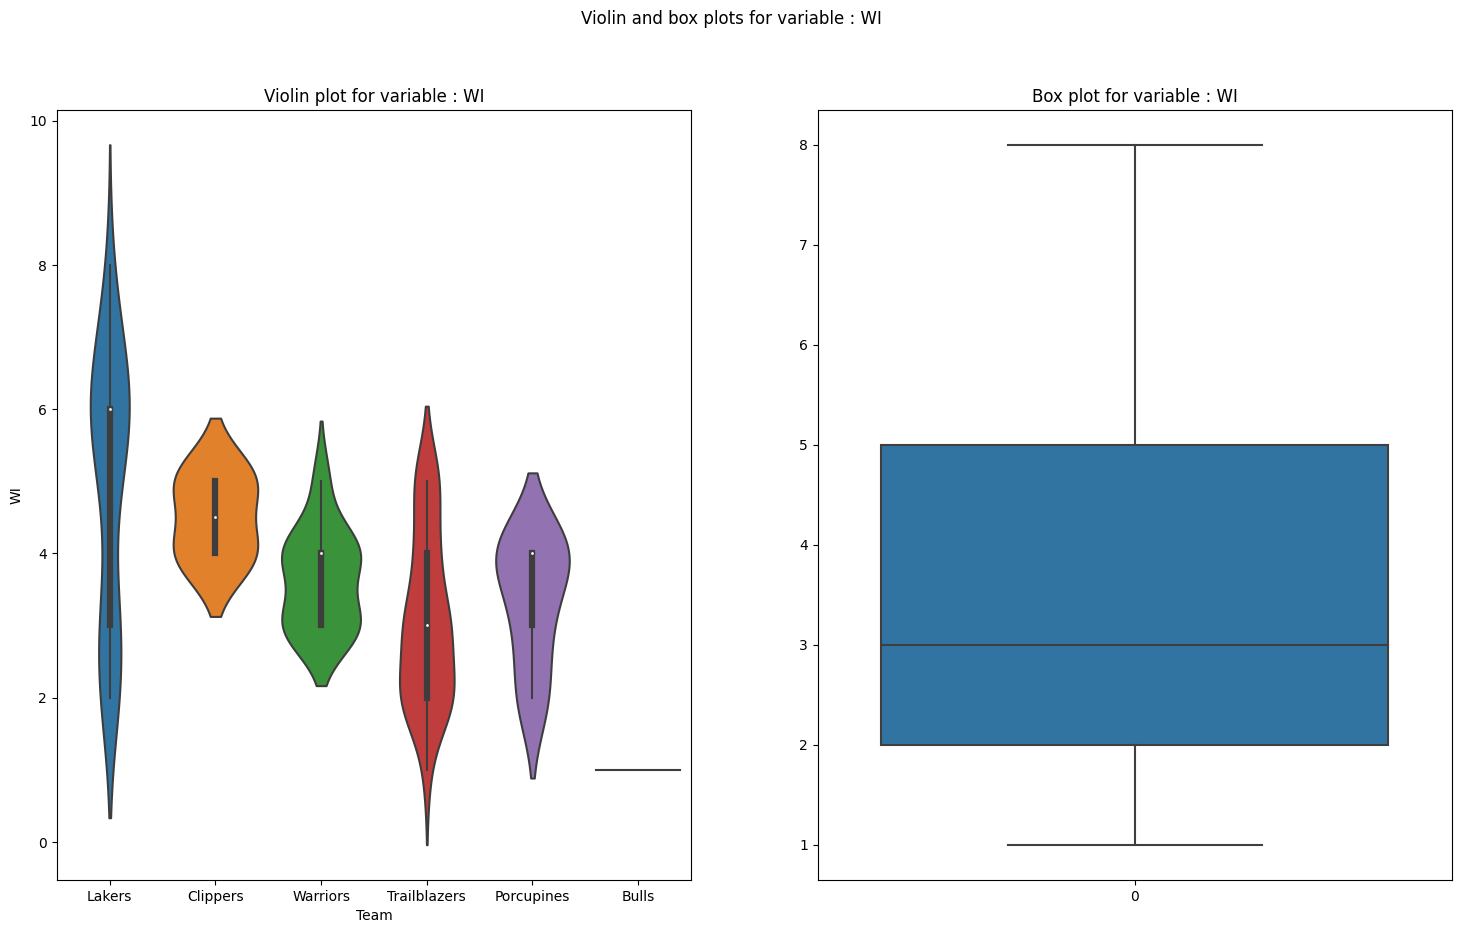

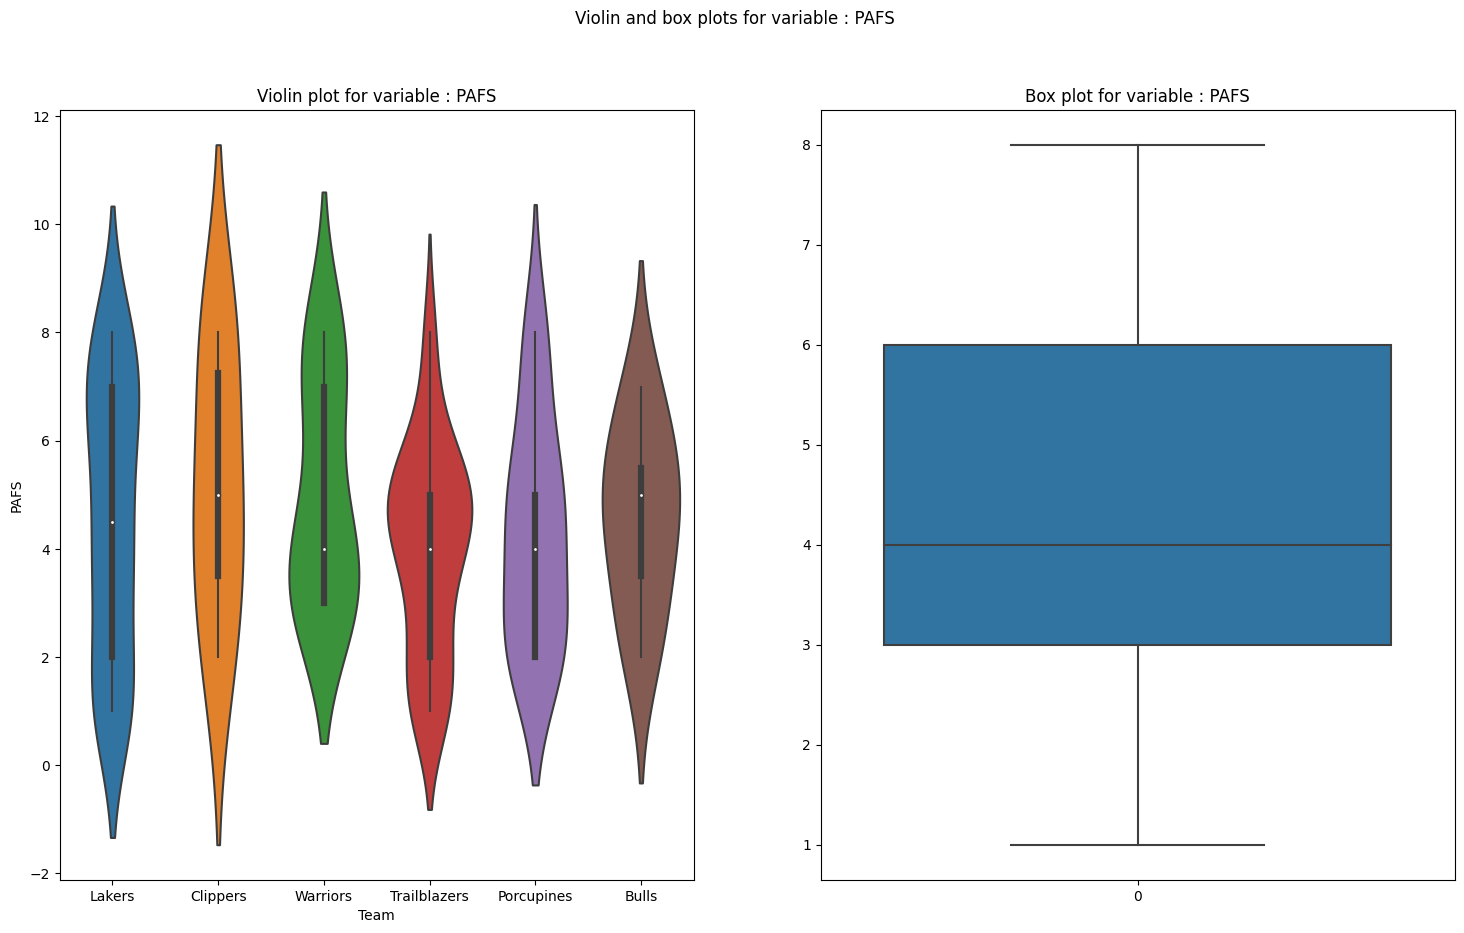

In [23]:
for x in ['WL','Yoga','Laps','WI','PAFS']:
  plotting_box_violin_plots(df,"Team",x)

### **Outliers Handling**

In [24]:
#function for finding out outliers
def find_outliers(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  Upper_End=Q3+1.5*IQR
  Lower_End=Q1-1.5*IQR

  outlier=df[column][(df[column]>Upper_End) | (df[column]<Lower_End)]

  return outlier

In [25]:
for column in ['WL','Yoga','Laps','WI','PAFS']:
  print('\n Outliers in column "%s"' %column)

  outlier= find_outliers(df,column)
  print(outlier)


 Outliers in column "WL"
8      1111111.0
142         56.0
143         56.0
144         59.0
Name: WL, dtype: float64

 Outliers in column "Yoga"
140    52.0
141    56.0
142    60.0
143    60.0
144    63.0
Name: Yoga, dtype: float64

 Outliers in column "Laps"
144    68.0
Name: Laps, dtype: float64

 Outliers in column "WI"
Series([], Name: WI, dtype: float64)

 Outliers in column "PAFS"
Series([], Name: PAFS, dtype: float64)


In [26]:
#removing outliers
df_clean=df.drop([142,143,144])

In [28]:
df_clean.shape

(156, 7)

In [29]:
df_clean['WL'][df_clean['WL']==1111111.0]=np.nan

In [30]:
df_clean['WL']

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: WL, Length: 156, dtype: float64

## **Null Values & Imputation Techniques**
**1. Pandas Way -> F fill and B fill, groupby**

**2. Sklearn -> Imputer -> Simple, Iterative, KNN**

**3. LGBM -> To fill in the missing values**

In [31]:
ncounts=pd.DataFrame([df_clean.isna().mean()]).T

In [32]:
sum_missing = pd.DataFrame([df_clean.isna().sum()]).T

In [33]:
percentage = pd.DataFrame([(df_clean.isna().mean()* 100).round(2)]).T

In [34]:
ncounts=ncounts.rename(columns={0:'Mean Data Missing'})
sum_missing = sum_missing.rename(columns={0:'Missing Values Sum'})
percentage = percentage.rename(columns={0:'Missing Values Percentage'})

In [35]:
df_concatenated = pd.concat([ncounts, sum_missing, percentage], axis=1)
df_concatenated

,Mean Data Missing,Missing Values Sum,Missing Values Percentage
Team,0.000000,0,0.00
Points,0.000000,0,0.00
WL,0.064103,10,6.41
Yoga,0.128205,20,12.82
Laps,0.089744,14,8.97
WI,0.089744,14,8.97
PAFS,0.185897,29,18.59


<Axes: title={'center': '% of missing values across each column'}>

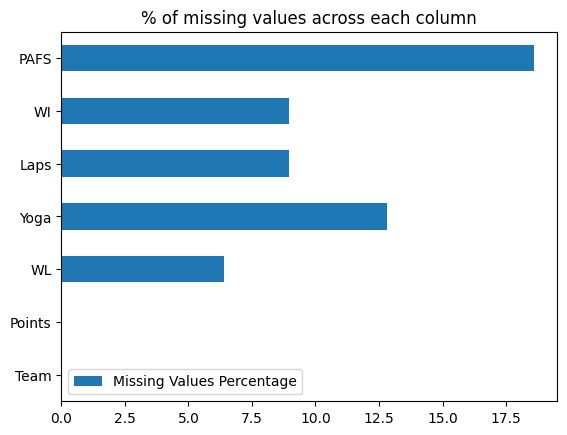

In [36]:
#plot of missing value in each column
percentage.plot(kind='barh',title='% of missing values across each column')

In [37]:
df_clean.shape, df_clean.dropna(axis=0).shape #rows

((156, 7), (94, 7))

In [38]:
df_clean.shape, df_clean.dropna(axis=1).shape

((156, 7), (156, 2))

### Pandas Imputer

Pandas provides various methods for data imputation, including forward fill (ffill), backward fill (bfill), and group-by imputation.

* ffill imputes missing values with the value from the previous observation in the same column. 

* bfill imputes missing values with the value from the next observation in the same column. 

* groupby imputation is a more advanced technique where the missing values are imputed based on the values from other observations that are in the same group. This technique is often used when the missing values are not missing at random and are related to other variables in the data.

In [71]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 0 to 158
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    156 non-null    object 
 1   Points  156 non-null    int64  
 2   WL      146 non-null    float64
 3   Yoga    136 non-null    float64
 4   Laps    142 non-null    float64
 5   WI      142 non-null    float64
 6   PAFS    127 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


### **Fill NA with -1**

In [34]:
#filling missing values with -1
df_clean['WL'].fillna(-1)

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: WL, Length: 156, dtype: float64

Text(0.5, 1.0, 'Distribution Plot for WL')

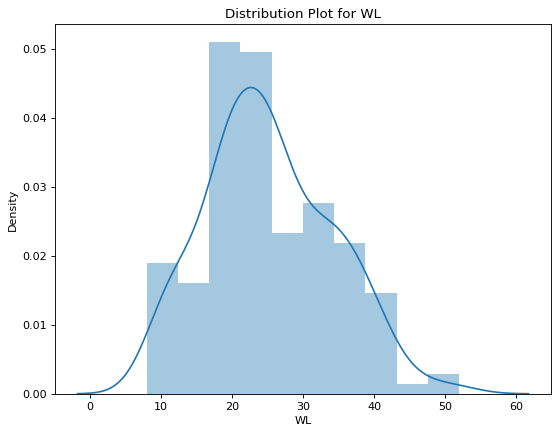

In [72]:
#visualizing after filling missing value with mean
figure(figsize=(8, 6), dpi=80)
sns.distplot(df_clean['WL'].fillna(df_clean['WL'].mean()))
plt.xlabel("WL")
plt.ylabel("Density")
plt.title("Distribution Plot for WL")

### **Fill NA with Median**

Text(0.5, 1.0, 'Distribution Plot for WL')

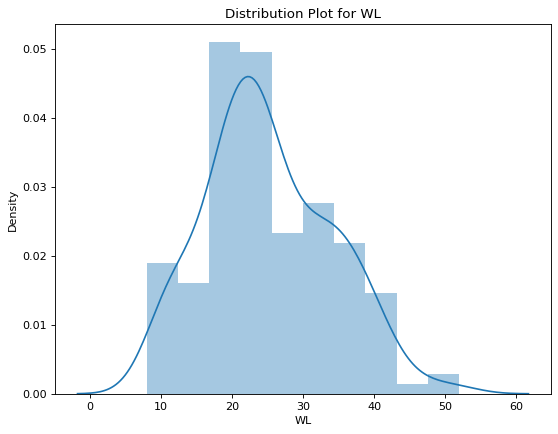

In [73]:
#visualizing after filling missing value with median
figure(figsize=(8, 6), dpi=80)
sns.distplot(df_clean['WL'].fillna(df_clean['WL'].median()))
plt.xlabel("WL")
plt.ylabel("Density")
plt.title("Distribution Plot for WL")

### **Fill NA with Mean**

**Extracting the WL Mean of each team**

In [40]:
#Groupby team
mean_WL=df_clean.groupby("Team")['WL'].mean().to_dict()


In [41]:
mean_WL

{'Bulls': 11.214285714285714,
 'Clippers': 29.0,
 'Lakers': 26.04255319148936,
 'Porcupines': 39.42857142857143,
 'Trailblazers': 25.425925925925927,
 'Warriors': 18.727272727272727}

The code iterates over each row in the 'df_clean' DataFrame. For each row, it checks if the 'WL' value is NaN. If it is, it retrieves the corresponding team value and looks up the mean value from the 'mean_WL' dictionary using the team as the key. Then, it updates the 'WL' value in the DataFrame at that specific index with the retrieved mean value. This process ensures that NaN values in the 'WL' column are replaced with the mean value specific to their corresponding team.

In [42]:
for index, row in df_clean.iterrows():
    team = row['Team']
    if pd.isna(row['WL']):
        mean_value = mean_WL.get(team)
        df_clean.at[index, 'WL'] = mean_value

The replace function cannot be directly used in this case because it does not support conditional replacements based on different values for each row. Here In this specific case, the replacement of NaN values in the 'WL' column depends on the value of the 'Team' column for each row. Since the replacement value varies for each row (based on the team).

Also replace function is used in the case of strings, here WL is a float and we need to replace it by np.nan which is also float, that is why we can use either fillna as we have shown later as an alternate option or iterate as we did above.

Text(0.5, 1.0, 'Distribution Plot for WL')

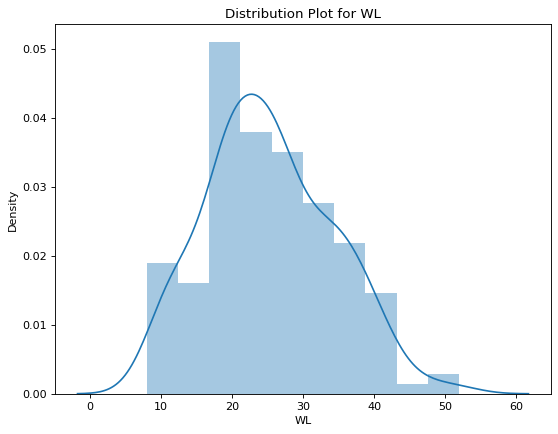

In [44]:
figure(figsize=(8, 6), dpi=80)
sns.distplot(df_clean['WL'].replace(mean_WL))
plt.xlabel("WL")
plt.ylabel("Density")
plt.title("Distribution Plot for WL")

In [45]:
df_clean['WL'].replace(mean_WL)

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: WL, Length: 156, dtype: float64

In [46]:
#you can use this function too fillna
df_clean['WL']=df_clean.groupby('Team')['WL'].transform(lambda x:x.fillna(x.mean()))

### Sklearn Imputer

* SimpleImputer: This imputer is a basic and straightforward imputation technique that replaces missing values with the mean, median, or most frequent value of the column. 

* IterativeImputer: This imputer replaces missing values by modeling each feature with missing values as a function of other features and then iteratively filling in missing values. This method works well when the missing values are missing at random and there is a high correlation between the features.

* KNN imputation is an advanced method for handling missing values. The basic idea behind KNN imputation is to fill missing values with the mean of the k-nearest neighbors to the missing value. This method requires that you choose a distance metric and the value of k. The advantage of KNN imputation is that it can preserve the correlations in the data, which is important for many machine learning algorithms.

### **Simple Imputer**

In [55]:
Features=['WL','Yoga','Laps','WI','PAFS']

from sklearn.impute import SimpleImputer
impt=SimpleImputer(strategy='mean')

#Fit & Transform

si_impt=impt.fit_transform(df_clean[Features])
si_impt_df=pd.DataFrame(si_impt,columns=Features)

si_impt_df

,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,20.823529,34.0,5.0,6.000000
...,...,...,...,...,...
151,12.0,12.000000,13.0,1.0,4.417323
152,12.0,12.000000,14.0,1.0,4.417323
153,12.0,13.000000,14.0,1.0,4.417323
154,13.0,14.000000,15.0,1.0,6.000000


### **Iterative Imputer**

In [48]:
ITI=IterativeImputer(max_iter=10)

#Fit & Transform

ITI_impt=ITI.fit_transform(df_clean[Features])

ITI_impt_df=pd.DataFrame(ITI_impt,columns=Features)

ITI_impt_df

,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,22.462586,34.0,5.0,6.000000
...,...,...,...,...,...
151,12.0,12.000000,13.0,1.0,4.411891
152,12.0,12.000000,14.0,1.0,4.412035
153,12.0,13.000000,14.0,1.0,4.412172
154,13.0,14.000000,15.0,1.0,6.000000


In [62]:
df_new = ITI_impt_df

### **KNN Imputer**

In [49]:
# KNN Imputer 

from sklearn.impute import KNNImputer

KNN=KNNImputer(n_neighbors=3)

#Fit & Transform

KNN_impt=KNN.fit_transform(df_clean[Features])

KNN_impt_df=pd.DataFrame(KNN_impt,columns=Features)

KNN_impt_df

,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,22.666667,34.0,5.0,6.000000
...,...,...,...,...,...
151,12.0,12.000000,13.0,1.0,4.666667
152,12.0,12.000000,14.0,1.0,5.333333
153,12.0,13.000000,14.0,1.0,6.000000
154,13.0,14.000000,15.0,1.0,6.000000


### LGBM Imputer 

LGBMImputer is a data imputation technique from the Python project kuma_utils https://github.com/analokmaus/kuma_utils.git, which is based on the LightGBM library. LGBMImputer is designed to fill in missing values in a dataset using gradient boosting decision trees. This technique is a variation of tree-based imputation, which uses regression trees to make predictions for missing values based on the values of other variables in the dataset.

The LGBMImputer class takes in a dataset and a list of columns to be imputed as inputs. It then fits a LightGBM model to the data, with the target variable being the missing values and the features being the remaining variables. After training, the model is used to predict the missing values.

One advantage of LGBMImputer is that it is able to handle both categorical and numerical data, unlike some other imputation techniques that are only suitable for one or the other. Additionally, LightGBM is a fast and efficient algorithm, so LGBMImputer is able to handle large datasets with many missing values quickly.

In [48]:
from ML_pipeline.kuma_utils.imputer import LGBMImputer

In [51]:
from kuma_utils.kuma_utils.preprocessing.imputer import LGBMImputer

In [ ]:
%%time
lgbm_itr=LGBMImputer(verbose=True)

df_itr=lgbm_itr.fit_transform(df_clean[Features])


df_itr_df=pd.DataFrame(df_itr,columns=Features)

In [51]:
#df_new=df_itr_df

### **Univariate Analysis**

Univariate analysis is a statistical technique used to examine the distribution of a single variable. It is the simplest form of data analysis that helps to understand the patterns, central tendency, and spread of the data.

There are several types of univariate analysis techniques, including:

* **Histograms**: A histogram is a graph that represents the frequency distribution of a set of data. It provides a visual representation of how the data is spread over a range of values. The x-axis represents the range of values and the y-axis represents the frequency of those values.

* **Box Plots**: A box plot is a visual representation of the distribution of a set of data. It consists of a box that encloses the middle 50% of the data (the interquartile range), a line that represents the median, and two whiskers that extend from the box to the minimum and maximum values. Outliers are also indicated on the plot.

* **Distribution Plots**: Distribution plots display the shape of the distribution of a single variable. They help to visualize the skewness and kurtosis of the data, as well as the presence of any outliers or extreme values. Examples of distribution plots include kernel density plots, normal quantile plots, and probability plots.

Univariate analysis is an important step in the data exploration process, as it helps to identify any outliers, skewness, or patterns in the data that may impact further analysis or modeling.






In [63]:
df_new.columns

Index(['WL', 'Yoga', 'Laps', 'WI', 'PAFS'], dtype='object')

<Axes: xlabel='WL', ylabel='Density'>

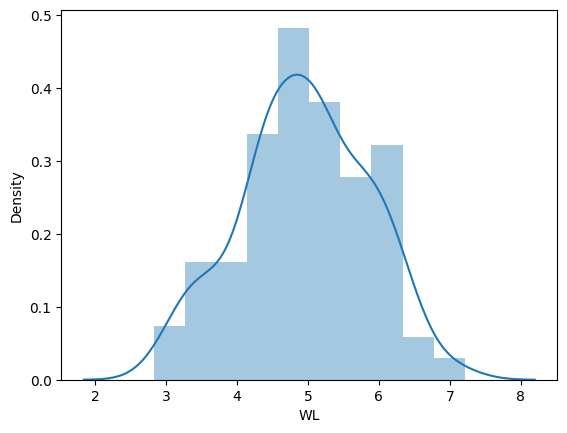

In [64]:
#distribution plot
sns.distplot(np.sqrt(df_new["WL"]))

<Axes: >

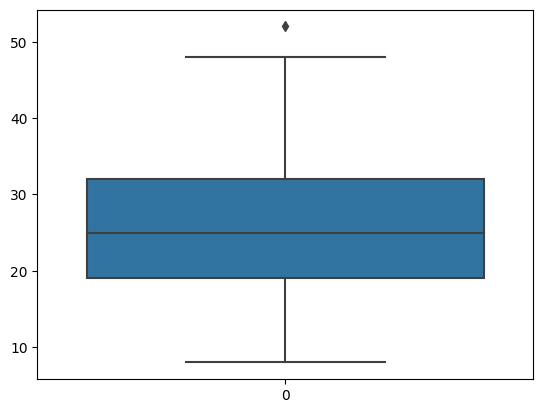

In [65]:
#boxplot
sns.boxplot(df_new["WL"])

<Axes: >

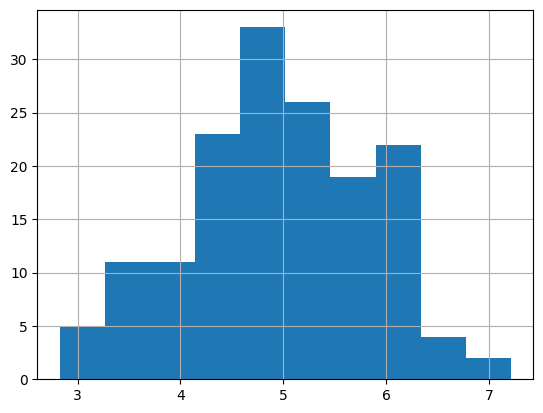

In [66]:
#histogram plot
np.sqrt(df_new["WL"]).hist()

<Axes: >

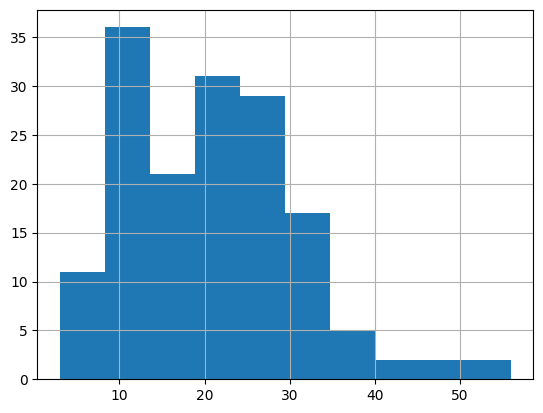

In [67]:
###Yoga

df_new["Yoga"].hist()

<Axes: xlabel='Yoga', ylabel='Density'>

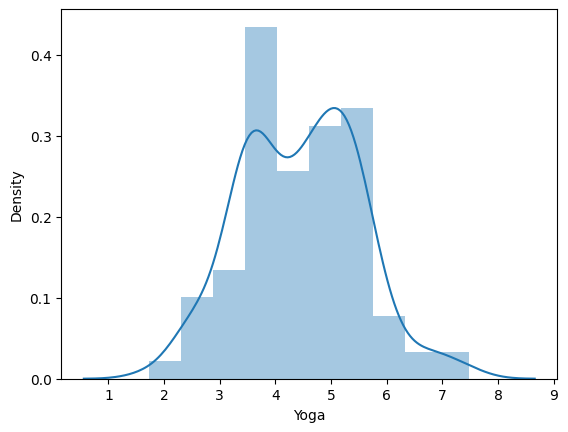

In [68]:
#distribution plot 
sns.distplot(np.sqrt(df_new["Yoga"]))

<Axes: xlabel='PAFS', ylabel='Density'>

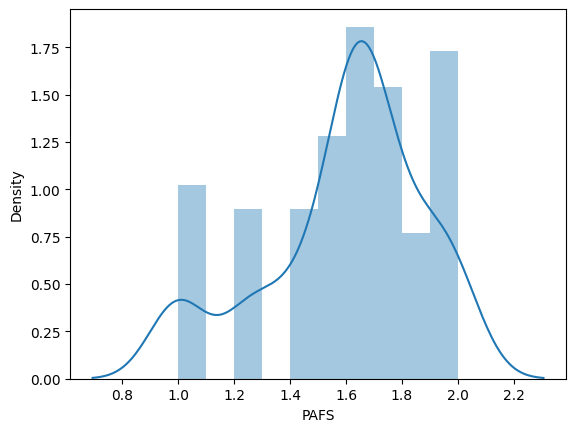

In [69]:
#distrribution plot
sns.distplot(np.cbrt(df_new["PAFS"]))

### **Bivariate Analysis**

Bivariate analysis is a statistical method used to analyze the relationship between two variables. It involves examining the relationship between two variables and determining if there is a correlation or association between the variables. The goal of bivariate analysis is to identify patterns and relationships in data that can be used to make predictions or draw conclusions.

In [70]:
##Bivariate Analysis

## 1 Linear Correlation --> Pearson Correlation

df_clean.shape,df_new.shape

((156, 7), (156, 5))

In [71]:
df_clean.columns

Index(['Team', 'Points', 'WL', 'Yoga', 'Laps', 'WI', 'PAFS'], dtype='object')

In [72]:
df_new.columns

Index(['WL', 'Yoga', 'Laps', 'WI', 'PAFS'], dtype='object')

In [73]:
df_new["Points"]=df_clean['Points']
df_new["Team"]=df_clean['Team']

In [74]:
#corerelation matrix
df_new.corr()

,WL,Yoga,Laps,WI,PAFS,Points
WL,1.000000,0.934245,0.964662,0.674708,0.018009,0.417535
Yoga,0.934245,1.000000,0.935045,0.632920,0.021191,0.346013
Laps,0.964662,0.935045,1.000000,0.796494,0.020447,0.429128
WI,0.674708,0.632920,0.796494,1.000000,0.059777,0.393713
PAFS,0.018009,0.021191,0.020447,0.059777,1.000000,0.038531
Points,0.417535,0.346013,0.429128,0.393713,0.038531,1.000000


Text(0.5, 1.0, 'Linear Correlation Matrix')

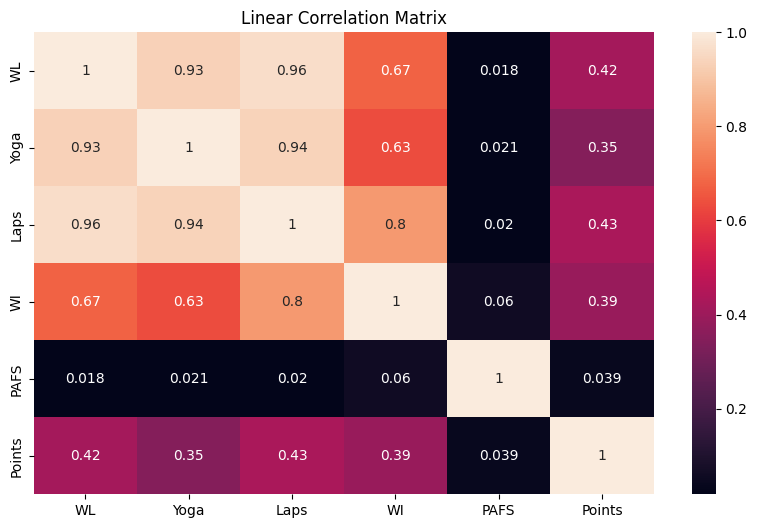

In [75]:
plt.rcParams["figure.figsize"]=(10,6)

#heatmap of correlation matrix
sns.heatmap(df_new.corr(),annot=True)

plt.title("Linear Correlation Matrix")

#### **Pairplots**
Pairplot, also known as scatterplot matrix, is a plotting technique used in bivariate data analysis. It creates a matrix of scatter plots, where each pair of features in a dataset is represented by a scatter plot in a grid format. The purpose of a pairplot is to visualize the relationship between multiple variables in a dataset and to observe any trends or patterns.

Each scatter plot in a pairplot compares two features and plots the values of one feature on the x-axis and the other feature on the y-axis. In the diagonal of the matrix, histograms or density plots are used to visualize the distribution of individual features.

Pairplot is a useful tool for understanding relationships between features, identifying outliers, and detecting any non-linear relationships. However, for a large number of features, the number of scatter plots can become overwhelming, making it difficult to draw meaningful conclusions. In such cases, other visualization techniques such as heatmaps or parallel coordinates plots may be used instead.

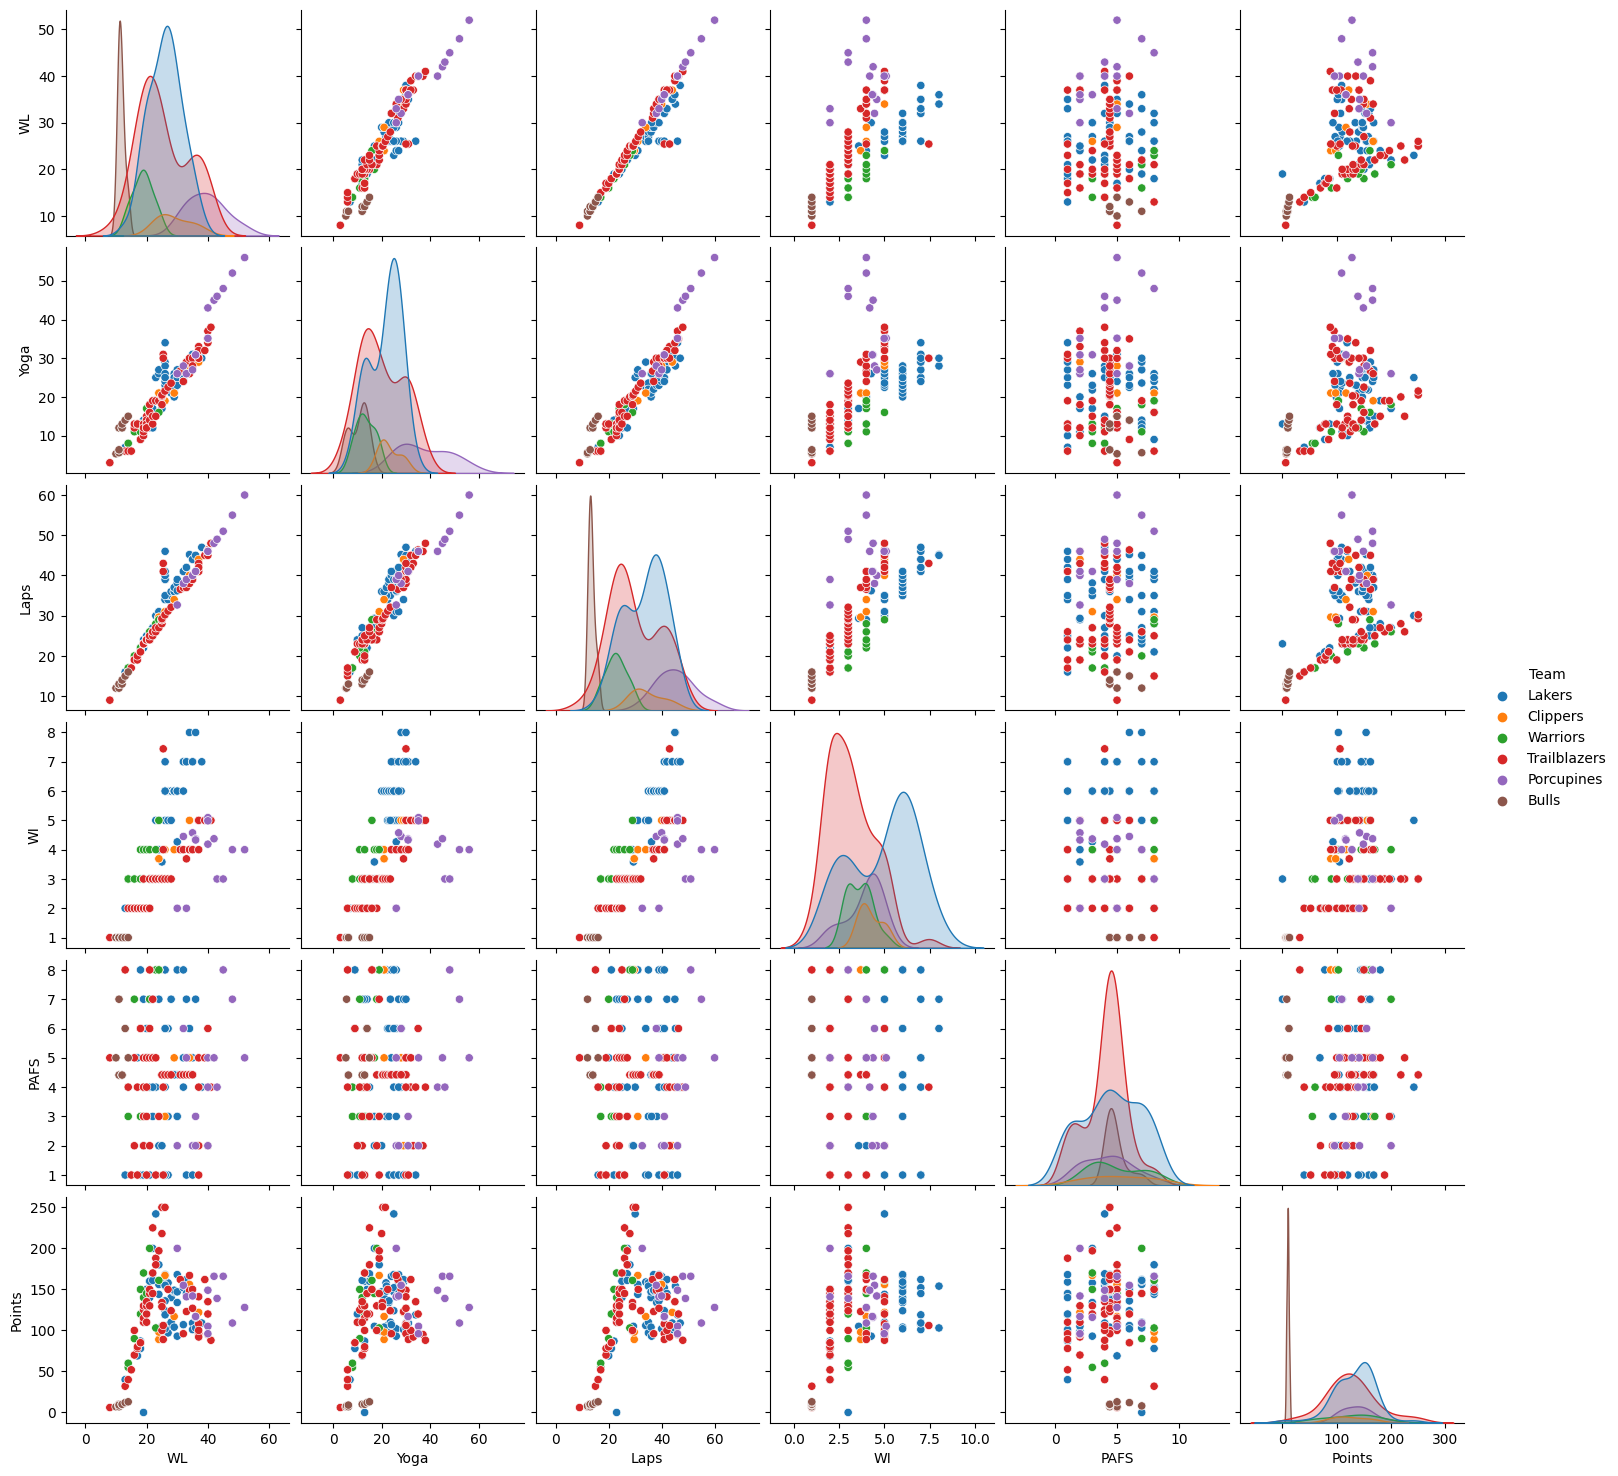

In [76]:
#pairplot of the data
sns.pairplot(df_new,kind='scatter',hue='Team')

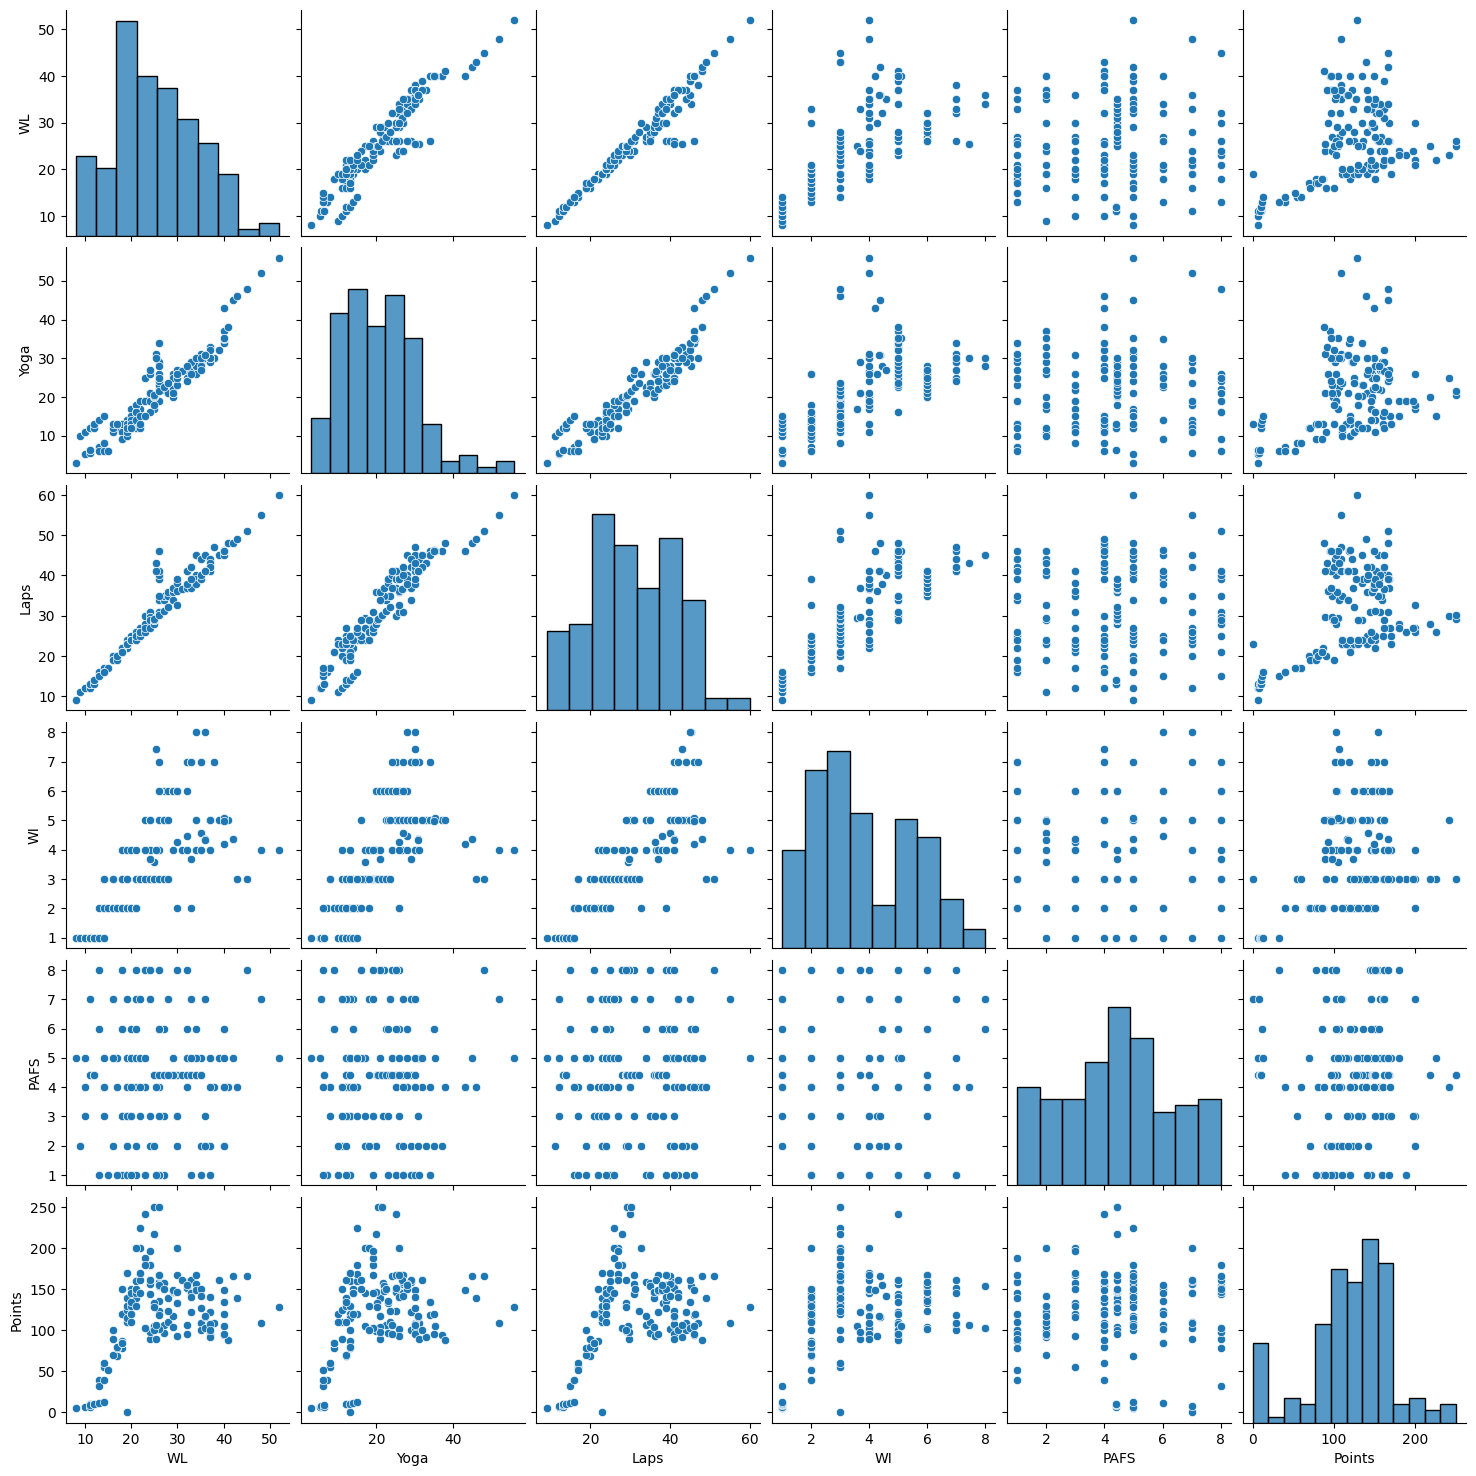

In [77]:
#scatter pairplot
sns.pairplot(df_new,kind='scatter')

#### **Chatterjee Correlation**

Chatterjee correlation is a coefficient of correlation proposed by Sourav Chatterjee that measures the degree of dependence between two random variables without assuming anything about their distributions. It is a simple and interpretable measure of dependence that ranges between 0 and 1, where 0 indicates independence and 1 indicates that one variable is a measurable function of the other.

Compared to other correlation coefficients, the Chatterjee Correlation is less sensitive to outliers and non-linear relationships between variables. However, it requires more computational resources due to its non-parametric nature.


One advantage of the Chatterjee correlation is that it has a simple asymptotic theory under the hypothesis of independence, similar to classical coefficients like Pearson's and Spearman's correlations. This means that we can use it to test the null hypothesis of independence between two variables.

The calculation involves the following steps:

* Rank the values of Y in the data set, assigning the smallest value the rank of 1, the second smallest the rank of 2, and so on. Store these ranks in a new column called 'rank'.

* Rank the values of X in the data set, assigning the smallest value the rank of 1, the second smallest the rank of 2, and so on. Store these ranks in a new column called 'rank_x'.

* Sort the data set in increasing order of 'rank_x'.

* Calculate the absolute difference between the ranks of Y for consecutive values of X. Sum up these differences.

* Calculate the Chatterjee correlation coefficient using the formula:
Chatterjee correlation coefficient = 1 - 3 * (sum of absolute differences in ranks) / (N^2 - 1), where N is the number of observations in the data set.

**The resulting Chatterjee correlation coefficient is a number between 0 and 1, with 0 indicating no dependence between the two variables and 1 indicating complete dependence.**

Here's a [link](https://arxiv.org/pdf/1909.10140.pdf) to the the paper.

In [79]:
#function for finding chatterejee correlation coefficient
def chatterjee_corr(df,x,y):
  N=df.shape[0]
  df_rank=df

  df_rank['rank']=df_rank[y].rank()
  #print(df_rank['rank'])

  df_rank['rank_x']=df_rank[x].rank()

  df_rank=df_rank.sort_values(by='rank_x')

  #1-3*(abs(sum(xri-1 - Xir))/n square-1

  #Diff function --> summation -> absolute

  chatt_corr=1- (3*df_rank['rank'].diff().abs().sum() )/ (pow(N,2)-1)

  return chatt_corr

In [80]:
chatterjee_corr(df_new,'WL','Points')

0.3954386685843435

In [81]:
chatterjee_corr(df_new,'WI','Points')

0.4055475652352578

In [82]:
chatterjee_corr(df_new,'Laps','Points')

0.41485514690774605

In [83]:
chatterjee_corr(df_new,'PAFS','Points')

0.1777275529073351

In [84]:
chatterjee_corr(df_new,'Yoga','Points')

0.3448941853297719

In [103]:
chatterjee_corr(df_new,'Team','Points')

0.314567495377029

### **Single Way ANOVA**

ANOVA, or Analysis of Variance, is a statistical method used to test whether there are significant differences between the means of two or more groups. It is a generalization of t-tests, which can only be used to compare two groups, and is commonly used in experimental design and analysis.

In order to perform ANOVA, you need at least one continuous variable and one categorical variable that separates your data into comparison groups. The test compares the variance of group means to the variance of the groups, which allows you to determine if the groups are part of a larger population or if they are separate populations with different means.

The null hypothesis for ANOVA is that all groups have the same mean, while the alternative hypothesis is that at least one group has a different mean. The test calculates $F$ values, which are the ratio of the between- and within-group mean squares, and p-values. The $F$ value is used to determine whether or not the means of the groups are significantly different, while the p-value is used to determine the probability of obtaining a certain $F$ value by chance.

It is important to note that ANOVA only tells you that there is a difference between groups, but not where the difference is. 

Overall, ANOVA is a powerful statistical tool that can help you understand whether there are significant differences between the means of different groups. It can be used in a wide range of fields, including biology, psychology, and engineering, to help researchers gain insights into their data and make informed decisions.

In [104]:
import random

nba_id=list(df_new.index.unique())

random.seed(13)

In [124]:
df_new.index.unique()

RangeIndex(start=0, stop=156, step=1)

In [125]:
sample_match_id=random.sample(nba_id,50)

In [126]:
sample_df=df_new[df_new.index.isin(sample_match_id)].reset_index(drop=True)

In [128]:
sample_df=sample_df[['Team','Points']]

groups=sample_df.groupby('Team').count().reset_index()

In [129]:
groups

,Team,Points
0,Bulls,5
1,Clippers,4
2,Lakers,14
3,Porcupines,3
4,Trailblazers,20
5,Warriors,4


In [130]:
##Normality

import scipy.stats as stats

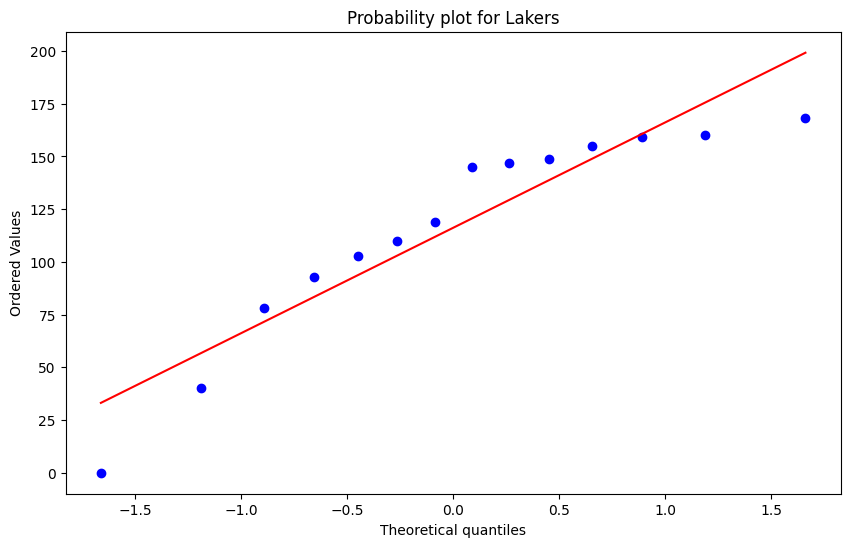

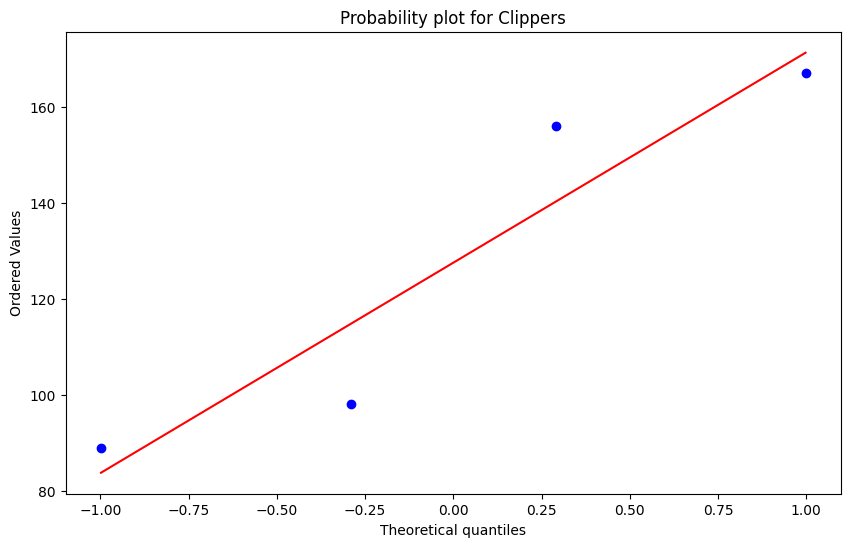

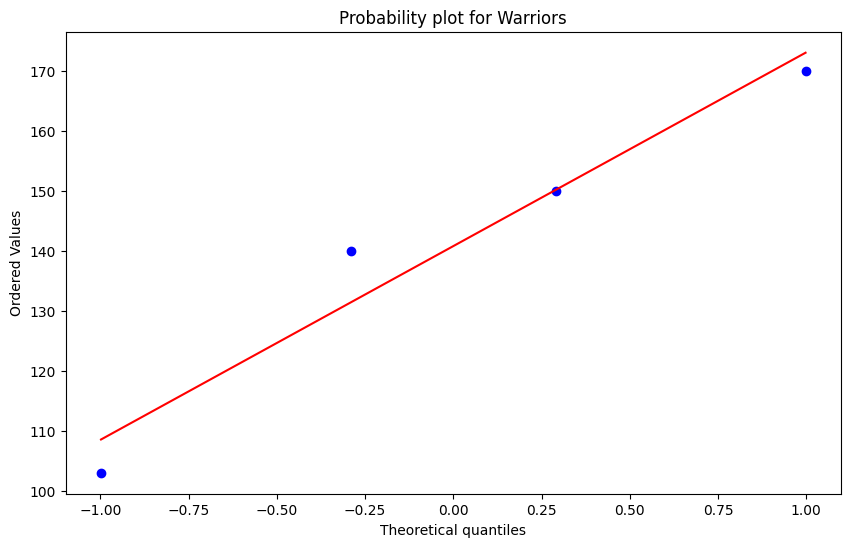

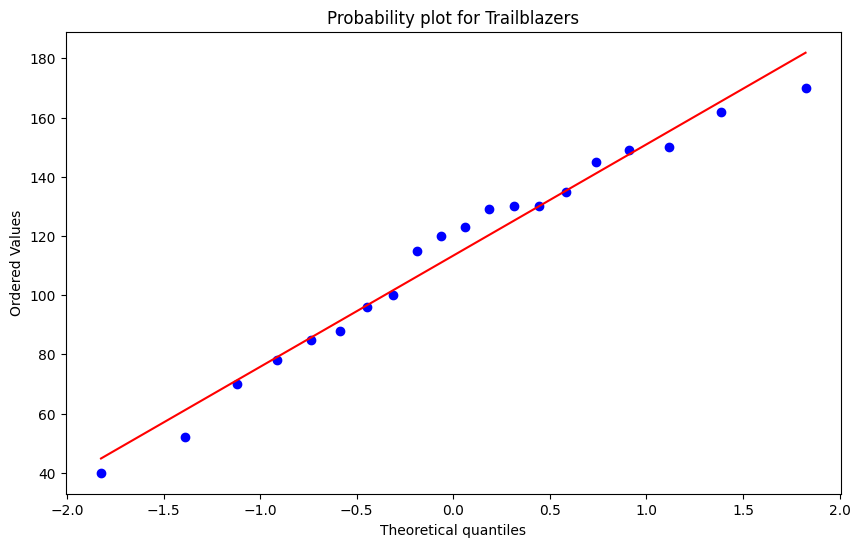

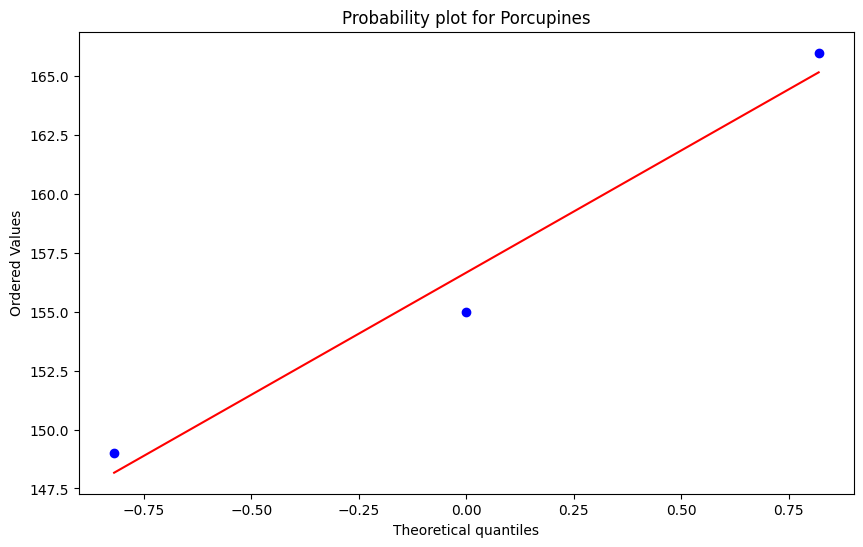

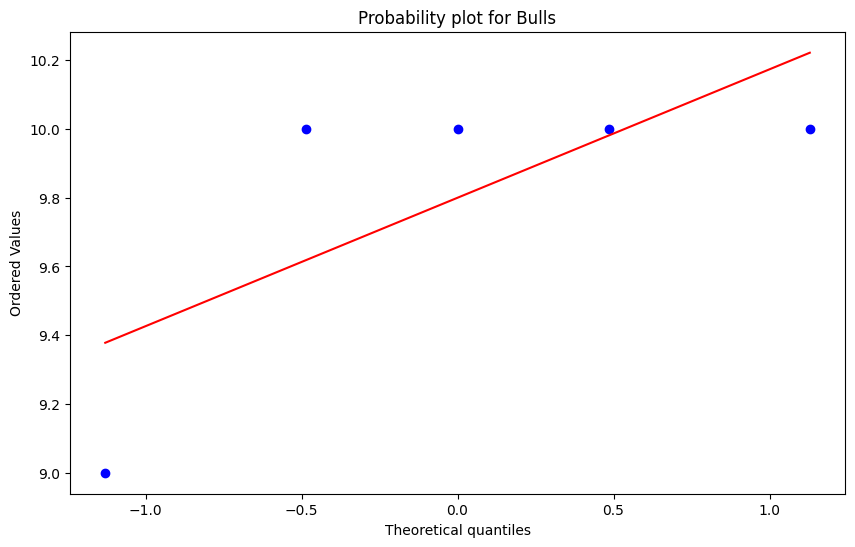

In [131]:
unique_teams=sample_df['Team'].unique()
#quantile quantile plots
for i in unique_teams:
  stats.probplot(sample_df[sample_df['Team']==i]['Points'],dist='norm',plot=plt)
  plt.title('Probability plot for '+ i)
  plt.show()

In [132]:
ratio=sample_df.groupby('Team').std().max()/sample_df.groupby('Team').std().min()
ratio

Points    111.492867
dtype: float64

In [133]:
#implement anova from scratch

data=[['Between Groups','','','','','',''],['Within Groups','','','','','',''],['Total','','','','','','']]

anova_table=pd.DataFrame(data,columns=['Variation','SS','df','MS','F value','P value','F critical'])

anova_table.set_index('Variation',inplace=True)

In [134]:
x_bar=sample_df['Points'].mean()

#porcupines - 2 overall 10 8  
SSTR=sample_df.groupby('Team').count()*(sample_df.groupby('Team').mean()-x_bar)**2

In [135]:
anova_table['SS']['Between Groups']=SSTR['Points'].sum()

In [136]:
anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,62489.019048,,,,,
Within Groups,,,,,,
Total,,,,,,


In [137]:
SSE=(sample_df.groupby('Team').count()-1)*sample_df.groupby('Team').std()**2

In [138]:
SSE

,Points
Team,
Bulls,0.800000
Clippers,4725.000000
Lakers,32319.714286
Porcupines,148.666667
Trailblazers,24798.550000
Warriors,2366.750000


In [139]:
anova_table['SS']['Within Groups']=SSE['Points'].sum()

In [140]:
anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,62489.019048,,,,,
Within Groups,64359.480952,,,,,
Total,,,,,,


In [141]:
total=SSE['Points'].sum()+SSTR['Points'].sum()

In [142]:
anova_table['SS']['Total']=total

In [143]:
anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,62489.019048,,,,,
Within Groups,64359.480952,,,,,
Total,126848.5,,,,,


In [144]:
anova_table['df']['Between Groups']=sample_df['Team'].nunique()-1
anova_table['df']['Within Groups']=sample_df.shape[0]-sample_df['Team'].nunique()
anova_table['df']['Total']=sample_df.shape[0]-1

In [145]:
anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,62489.019048,5,,,,
Within Groups,64359.480952,44,,,,
Total,126848.5,49,,,,


In [146]:
anova_table['MS']=anova_table['SS']/anova_table['df']
anova_table['F value']['Between Groups']=anova_table['MS']['Between Groups']/anova_table['MS']['Within Groups']

anova_table['P value']['Between Groups']=1-stats.f.cdf(anova_table['F value']['Between Groups'],
                                                        anova_table['df']['Between Groups'],
                                                        anova_table['df']['Within Groups'])

anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,62489.019048,5,12497.80381,8.544248,0.00001,
Within Groups,64359.480952,44,1462.715476,,,
Total,126848.5,49,2588.744898,,,


In [147]:
alpha=0.05

hypothesis_type="two tailed"

if hypothesis_type=="two tailed":
  alpha=alpha/2


anova_table['F critical']['Between Groups']=stats.f.ppf(1-alpha,
                                                        anova_table['df']['Between Groups'],
                                                        anova_table['df']['Within Groups'])

anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,62489.019048,5,12497.80381,8.544248,0.00001,2.871184
Within Groups,64359.480952,44,1462.715476,,,
Total,126848.5,49,2588.744898,,,


In [148]:
# Pvalue approach

print("Approach for P value ")

conclusion="Failed to reject null hypothesis"

if anova_table['P value']['Between Groups']<=alpha:
  conclusion="Null hypothesis is rejected"

print("F value for the table is ", anova_table['F value']['Between Groups'],"and p value is ",anova_table['P value']['Between Groups'] )

print(conclusion)

Approach for P value 
F value for the table is  8.544248018810414 and p value is  1.0249896923442137e-05
Null hypothesis is rejected


In [98]:
# Fcritical approach

print("Approach for F critical ")

conclusion="Failed to reject null hypothesis"

if anova_table['F value']['Between Groups']>anova_table['F critical']['Between Groups']:
  conclusion="Null hypothesis is rejected"

print("F value for the table is ", anova_table['F value']['Between Groups'],"and F critical value is ",anova_table['F critical']['Between Groups'] )

print(conclusion)

Approach for F critical 
F value for the table is  8.326442762673361 and F critical value is  2.871183837102218
Null hypothesis is rejected


## One Hot Encoding

In [149]:
## Processing data for modelling
#one hot encoding
one_hot_df=pd.get_dummies(df_clean,columns=['Team'],drop_first=True)

In [151]:
X=one_hot_df[['WL', 'Yoga', 'Laps', 'WI', 'PAFS', 'Team_Clippers',
       'Team_Lakers', 'Team_Porcupines', 'Team_Trailblazers', 'Team_Warriors']]

y=one_hot_df['Points']

#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

print("X train dimension is ",X_train.shape)
print("y train dimension is ",y_train.shape)
print("X test dimension is ",X_test.shape)
print("y test dimension is ",y_test.shape)

X train dimension is  (124, 10)
y train dimension is  (124,)
X test dimension is  (32, 10)
y test dimension is  (32,)


In [156]:
#Start Imputing here

imputer=IterativeImputer()

#Fit & Transform

#imputer=LGBMImputer(verbose=True)

X_train_full=imputer.fit_transform(X_train)

X_train_clean=pd.DataFrame(X_train_full,columns=X_train.columns)

X_train_clean.head()

,WL,Yoga,Laps,WI,PAFS,Team_Clippers,Team_Lakers,Team_Porcupines,Team_Trailblazers,Team_Warriors
0,30.000000,26.0,38.866102,5.795182,3.0,0.0,1.0,0.0,0.0,0.0
1,25.425926,30.0,43.000000,5.659154,4.0,0.0,0.0,0.0,1.0,0.0
2,22.000000,17.0,27.000000,3.000000,3.0,0.0,1.0,0.0,0.0,0.0
3,19.000000,13.0,23.000000,3.000000,7.0,0.0,1.0,0.0,0.0,0.0
4,18.000000,9.0,21.000000,2.000000,6.0,0.0,0.0,0.0,1.0,0.0


## **Modeling**


In [163]:
y_train.index

Int64Index([ 54, 122,  50,  40,  81,  27, 121,  48, 111,  30,
            ...
              1, 150, 146,  18,  77,   8,  28,  98,  87, 127],
           dtype='int64', length=124)

In [162]:
X_train_clean.index

RangeIndex(start=0, stop=124, step=1)

In [164]:
X_train_clean_reset = X_train_clean.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)

In [165]:
#result=sm.OLS(y_train,X_train_clean).fit()
result = sm.OLS(y_train_reset, X_train_clean_reset).fit()


In [167]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Points   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              123.1
Date:                Wed, 17 Apr 2024   Prob (F-statistic):                    3.01e-56
Time:                        15:55:52   Log-Likelihood:                         -627.41
No. Observations:                 124   AIC:                                      1275.
Df Residuals:                     114   BIC:                                      1303.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [169]:
X_const=sm.add_constant(X_train_clean_reset)

result=sm.OLS(y_train_reset,X_const).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     11.48
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           2.17e-13
Time:                        15:56:27   Log-Likelihood:                -627.29
No. Observations:                 124   AIC:                             1277.
Df Residuals:                     113   BIC:                             1308.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.5413     16.54

### **Interpreting Linear Regression Results**

The regression summary from the OLS library provides several key statistics and measures related to the regression analysis. Here is a list of some of the most important information that you get in the regression summary:

* Dep. Variable: The dependent variable for the regression model, which is also known as the response variable.

* Model: The regression model used for the analysis, for example, OLS (Ordinary Least Squares).

* Method: The optimization method used to fit the model, for example, Least Squares.

* R-squared: The coefficient of determination (R-squared) measures the proportion of variation in the dependent variable that can be explained by the independent variables. The higher the R-squared, the better the model fits the data.

* Adj. R-squared: The adjusted R-squared adjusts the R-squared for the number of independent variables in the model. It gives a better measure of model fit when comparing models with different numbers of independent variables.

* F-statistic: The F-statistic measures the overall significance of the regression model. It tests the null hypothesis that all of the independent variables have zero impact on the dependent variable.

* Prob (F-statistic): The p-value for the F-statistic, which represents the probability of observing the F-statistic given the null hypothesis is true. A low p-value indicates that the model is significant.

* Log-Likelihood: The log-likelihood measures the goodness of fit of the model based on the likelihood function.

* AIC: The Akaike Information Criterion (AIC) is a measure of the relative quality of a statistical model, taking into account both the goodness of fit and the complexity of the model. A lower AIC indicates a better-fit model.

* BIC: The Bayesian Information Criterion (BIC) is similar to the AIC, but places more emphasis on the complexity of the model. A lower BIC indicates a better-fit model.

* Coef: The estimated coefficients for the independent variables in the model. Each coefficient represents the change in the dependent variable for a one-unit change in the corresponding independent variable, holding all other independent variables constant.

* std err: The standard error for each coefficient, which is an estimate of the variability of the coefficient.

* t: The t-value for each coefficient, which measures the significance of the coefficient. A high t-value indicates that the coefficient is significantly different from zero.

* P>|t|: The p-value for each coefficient, which represents the probability of observing the t-value given the null hypothesis that the coefficient is zero. A low p-value indicates that the coefficient is significant.

* Omnibus: It tests the null hypothesis that the residuals are normally distributed. A large value of Omnibus indicates non-normality.

* Durbin-Watson: It tests for autocorrelation in residuals. The value of the Durbin-Watson statistic ranges between 0 and 4. A value close to 2 indicates no autocorrelation in the residuals, while a value close to 0 or 4 indicates positive or negative autocorrelation, respectively.

* Prob(Omnibus): The p-value of the Omnibus test. A low p-value (e.g. < 0.05) indicates that the residuals are not normally distributed.

* JB: The Jarque-Bera test statistic for skewness and kurtosis. A large value of JB indicates that the residuals deviate from normality.

* Skew: The skewness of the residuals. A value close to zero indicates that the residuals are symmetrically distributed.

* Prob(JB): The p-value of the Jarque-Bera test. A low p-value (e.g. < 0.05) indicates that the residuals are not normally distributed.

* Kurtosis: The kurtosis of the residuals. A value close to 3 indicates that the residuals follow a normal distribution.

* Cond. No.: The condition number, which measures the sensitivity of the solution to small perturbations in the input. A large value of Cond. No. indicates that the solution is highly sensitive to small changes in the data, which can cause numerical instability and should be interpreted with caution.


This information provides a comprehensive summary of the regression analysis and helps you to evaluate the quality and fit of the model.





### **Akaike Information Criterion and Bayesian Information Criterion**

AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) are measures of the goodness of fit for a model that penalize models for their complexity. Both AIC and BIC are used to compare different models and to select the best-fit model for a given set of data.

AIC measures the relative quality of a model by comparing the information loss incurred by the model to the complexity of the model. The formula for AIC is:

$$AIC = 2k - 2ln(L)$$

where k is the number of parameters in the model, and L is the maximum value of the likelihood function for the model. The smaller the AIC value, the better the model.

BIC, on the other hand, measures the trade-off between the goodness of fit of the model and the complexity of the model by penalizing models with more parameters. The formula for BIC is:

$$BIC = k ln(n) - 2ln(L)$$

where n is the number of observations, k is the number of parameters, and L is the maximum value of the likelihood function for the model. Like AIC, the smaller the BIC value, the better the model.

In practical terms, AIC and BIC are used to determine which model provides the best balance between the goodness of fit and the number of parameters. If a model has a high AIC or BIC value, it suggests that the model is over-complex or overfitting the data. In such cases, a simpler model is preferred over a more complex model.

### **Likelihood**

Likelihood is a concept used in statistics and machine learning to quantify how well a particular model fits a given set of data. It is a function of the parameters of a model and the observed data. The likelihood function measures the probability of observing the actual data given the parameters of the model.

In practice, it is often more convenient to use the log-likelihood function instead of the likelihood function. The log-likelihood function is simply the logarithm of the likelihood function:

The log-likelihood function is easier to work with mathematically, as the logarithm transforms products into sums and makes it easier to perform derivative calculations.

In regression analysis, the log-likelihood function is used to find the parameters that maximize the probability of observing the actual data. The optimization algorithm finds the values of the parameters that maximize the log-likelihood function, which corresponds to finding the maximum of the likelihood function.

All in all, likelihood is a measure of how well a model fits a set of data and is used to choose the best model from a set of candidate models. The log-likelihood function is a convenient form of the likelihood function that makes it easier to perform mathematical operations and find the best parameters for a model.

In [170]:
X_test.head()

,WL,Yoga,Laps,WI,PAFS,Team_Clippers,Team_Lakers,Team_Porcupines,Team_Trailblazers,Team_Warriors
10,28.0,21.0,36.0,6.0,NaN,0,1,0,0,0
55,24.0,21.0,NaN,NaN,8.0,1,0,0,0,0
72,8.0,3.0,9.0,1.0,5.0,0,0,0,1,0
34,38.0,30.0,47.0,7.0,4.0,0,1,0,0,0
44,21.0,14.0,24.0,3.0,7.0,0,1,0,0,0


In [171]:
test=pd.DataFrame(imputer.transform(X_test))

In [175]:
res=result.predict(sm.add_constant(test))

In [176]:
#res=result.predict(sm.add_constant(test[['WL', 'Yoga', 'Laps', 'WI', 'PAFS', 'Team_Clippers', 'Team_Lakers',
       #'Team_Porcupines', 'Team_Trailblazers', 'Team_Warriors']]))

### **Errors in Regression**
 
The regression line regress towards the mean to create the best fit which essentially means that the errors are at the lowest. In the above plot, it is visible that the regression line is not able to exactly predict the true values. There is always going to be some space for errors.
 
Let's understand the various errors in Regression:
 
 
* The mean absolute error (MAE) is the most basic regression error statistic to grasp. We'll compute the residual for each data point individually, using only the absolute value of each so that negative and positive residuals don't cancel out. The average of all these residuals is then calculated. MAE essentially describes the typical magnitude of the residuals. <br>
$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y-\hat y|$$
 
* The mean square error (MSE) is identical to the mean absolute error (MAE) but squares the difference before aggregating all of them. The MSE will nearly always be greater than the MAE because we are squaring the difference. Because of this, we are unable to directly compare the MAE and MSE. We are limited to comparing the error metrics of our model to those of a rival model. The presence of outliers in our data makes the square term's impact on the MSE equation very clear. In MAE, each residual adds proportionally to the overall error, whereas in MSE, the error increases quadratically. As a result, our data outliers will ultimately result in a considerably bigger total error in the MSE than they will in the MAE. Similarly to this, our model will suffer more if it predicts values that are significantly different from the matching actual value.
This means that in MSE as opposed to MAE, substantial disparities between actual and predicted values are punished more severely. <br>If we wish to limit the importance of outliers, we should use MAE because outlier residuals do not contribute as much to overall error as MSE. Finally, the decision between MSE and MAE is application-specific and depends on how large errors need to be handled.
 
$$MSE= \frac{1}{n}\sum_{i=1}^{n}(y-\hat y)^2$$
 
 
* The root mean squared error (RMSE) is another error statistic you may come upon. It is the square root of the MSE, as the name implies. Because the MSE is squared, its units differ from the original output. RMSE is frequently used to transform the error metric back into comparable units, making interpretation easier. Outliers have a comparable effect on the MSE and RMSE because they both square the residual.
 
$$RMSE= \sqrt(\frac{1}{n}\sum_{i=1}^{n}(y-\hat y)^2)$$
 
 
* The percentage counterpart of MAE is the mean absolute percentage error (MAPE). Just as MAE is the average amount of error created by your model, MAPE is the average distance between the model's predictions and their associated outputs. MAPE, like MAE, has a clear meaning because percentages are easier for people to understand. Because of the use of absolute value, MAPE and MAE are both resistant to the effects of outliers.
 
$$MAPE= \frac{100\%}{n}\ \sum_{i=1}^{n}\left| \frac{y-\hat y}{y} \right|$$

In [177]:
print("MAE of the model is",mean_absolute_error(y_test,res))

MAE of the model is 31.540593811644218


In [178]:
print("MSE of the model is",mean_squared_error(y_test,res))

MSE of the model is 1848.7811343088522


In [179]:
print("RMSE of the model is",np.sqrt(mean_squared_error(y_test,res)))

RMSE of the model is 42.997454974787196


In [180]:
print("R2 score for test is",metrics.r2_score(y_test,res))

R2 score for test is 0.13087364681857117


### **Polynomial Regression**


Polynomial regression is a type of regression analysis in which the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial. In other words, it is a method of finding the best fitting polynomial equation to describe the relationship between the data.

The mathematics behind polynomial regression involves finding the best fitting polynomial equation to describe the relationship between the independent variable x and the dependent variable y. This is done by using the method of "ordinary least squares" (OLS), which is a technique for estimating the unknown parameters of a polynomial equation by minimizing the sum of the squares of the differences between the predicted and actual values of the dependent variable.



The OLS method starts by assuming an nth degree polynomial equation of the form:

$y = \beta_0 + \beta_1x + \beta_2x^2 + ... + \beta_nx^n$

where $\beta_0, \beta_1, ..., \beta_n$ are the coefficients of the polynomial and x is the independent variable. These coefficients are estimated from the data by minimizing the "residual sum of squares" (RSS), which is defined as:

$RSS = \sum_{i=1}^{n}(y_i - \beta_0 - \beta_1x_i - \beta_2x_i^2 - ... - \beta_nx_i^n)^2$

The goal is to find the values of $\beta_0, \beta_1, ..., \beta_n$ that minimize the RSS. This can be done by taking the partial derivative of the RSS with respect to each coefficient and setting it equal to zero. This results in a set of n+1 equations that can be solved simultaneously to find the optimal values of the coefficients.

Once the optimal values of the coefficients are found, the polynomial equation can be used to make predictions about new values of the independent variable. The predicted value of y for a given value of x is given by plugging in the x value and the estimated coefficients into the polynomial equation.

In addition to the OLS method, there are other methods for estimating the coefficients of polynomial equations such as Ridge Regression and Lasso Regression. These methods add a penalty term to the OLS method which helps to reduce overfitting.

Overall, the mathematics of polynomial regression involve using the method of OLS to estimate the coefficients of a polynomial equation that best fits the data. This equation can then be used to make predictions about new values of the independent variable.



Polynomial regression has several advantages over linear regression. Firstly, it can model non-linear relationships between the independent and dependent variables. This is useful in cases where the data shows a curved relationship and linear regression cannot capture this pattern. Secondly, polynomial regression can model interactions between variables and can also be used to model periodic phenomena.

However, polynomial regression also has some disadvantages. One major disadvantage is that it can overfit the data, which means that the model can fit the noise in the data and not the underlying relationship. This can lead to poor predictions on new data. Additionally, polynomial regression can have high variance and low bias, which means that it is sensitive to small fluctuations in the data and can be unstable.

To overcome these disadvantages, techniques such as Ridge Regression and Lasso Regression can be used. These methods add a penalty term to the OLS method which helps to reduce overfitting.

Overall, polynomial regression is a useful tool for modeling non-linear relationships in data, but it should be used with caution to avoid overfitting. It can be a powerful tool for data scientists to uncover patterns in data and make predictions about future observations.

Text(0.5, 1.0, 'Polynomial Regression Example')

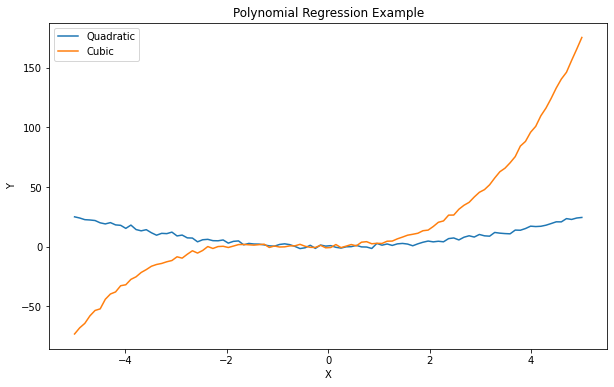

In [112]:
x = np.linspace(-5, 5, 100)
y = x**2  + np.random.normal(0, 1, 100)
y_cubic = x**3 + 2*x**2 + np.random.normal(0, 1, 100)


# Plotting the data
plt.plot(x, y, label='Quadratic')
plt.plot(x, y_cubic, label='Cubic')
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression Example')

In [113]:
#Line is not a good fit and so we are going for polynomials
# We will create a line as well as a polynomial for comparison

#numpy.polyfit
# numpy.linespace -> create space and plot values -> Space creation using args
# numpy.poly1d -> To create the polynomial equation 

In [181]:
def create_polynomial_plot(feature,label):
  #convert to 1d
  x_coordinates=feature
  y_coordinates=np.squeeze(label)

  linear_poly=np.poly1d(np.polyfit(x_coordinates,y_coordinates,1))
  quadratic_poly=np.poly1d(np.polyfit(x_coordinates,y_coordinates,2))
  cubic_poly=np.poly1d(np.polyfit(x_coordinates,y_coordinates,3))


  values=np.linspace(x_coordinates.min(),x_coordinates.max(),len(x_coordinates))
  plt.scatter(x_coordinates,y_coordinates,color='blue')
  plt.plot(values,linear_poly(values),color='cyan',label='Linear Model')
  plt.plot(values,quadratic_poly(values),color='red',label='Quadratic Model')
  plt.plot(values,cubic_poly(values),color='yellow',label='Cubic Model')

  plt.xlabel("%s from data" %(feature.name))
  plt.ylabel("Points")

  plt.rcParams["figure.figsize"]=(12,6)

  plt.legend()
  plt.title("Linear vs Quadratic")

  plt.show()


  


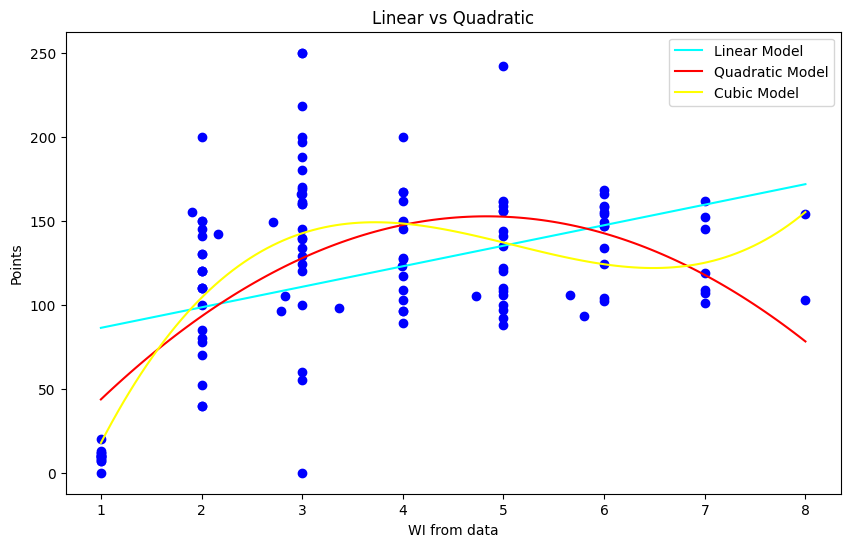

In [182]:
create_polynomial_plot(X_train_clean_reset.WI,y_train_reset)

In [116]:
########
#1 Create a set of polynomial features

#2 Apply a linear regression 
########

In [189]:
poly=PolynomialFeatures(degree=1)
X_poly=poly.fit_transform(X_train_clean_reset)

poly.fit(X_poly,y_train_reset)

PolynomialFeatures(degree=1)

In [190]:
from sklearn import linear_model

lm=linear_model.LinearRegression()

lm.fit(X_poly,y_train_reset)

LinearRegression()

In [191]:
#Doing predictions on test data

predictions=lm.predict(poly.fit_transform(test))

print("R2 score for test is",metrics.r2_score(y_test,predictions))

R2 score for test is 0.1308736468185685


In [192]:
print("RMSE of the model is",np.sqrt(mean_squared_error(y_test,predictions)))

RMSE of the model is 42.99745497478726


In [193]:
#Degree 1 --> RMSE - 47.4 R2 - 0.23
#Degree 2 --> RMSE - 39.8 R2 - 0.45
#Degree 3 --> RMSE - 297 R2 - -29

In [ ]:
#We can also use below function for polynomial regression
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# pp=Pipeline([
#     ('poly',PolynomialFeatures(degree=2)),
#     ('model',LinearRegression())
# ])

# pp.fit(X_train_clean,y_train)
# y_pred=pp.predict(test)

## **Conclusion**

In conclusion, the objective of this project was to predict the points scored by a sports team in the NBA using polynomial regression. We utilized the NBA dataset which included various relevant variables such as the team, number of points scored, and various practices like weightlifting, yoga, and running sessions.

To arrive at the final solution, we first performed data preprocessing techniques such as imputation to handle missing values in the dataset. Then we explored the relationships between the variables in the dataset using univariate and bivariate analysis.

We then used polynomial regression to build a model that could predict the points scored by the team. Finally, we evaluated the performance of the model using metrics such as mean absolute error and R-squared.

The outcome of this project highlights the importance of data analysis and modeling in understanding the relationships between variables and making accurate predictions. The polynomial regression model built in this project can serve as a valuable tool for stakeholders who are interested in understanding the points scored by a sports team in the NBA.

## **Polynomial Regression in Real Life**

Polynomial regression is used in various real-life applications, here are a few examples:

* Stock Market Analysis: The stock market is also a classic example of where polynomial regression is used. The prices of stocks often exhibit non-linear trends, with prices fluctuating over time. A polynomial regression model can be used to identify these trends and make predictions about future stock prices.

* Climate Change Studies: In climate change studies, polynomial regression is used to model the relationship between various environmental factors, such as temperature and precipitation, and their impact on ecosystems. The relationships between these factors can be complex, and polynomial regression is often used to help model and understand these relationships.

* Predicting housing prices: A polynomial regression model can be used to predict housing prices based on various factors such as location, square footage, and number of rooms. The model can capture non-linear relationships between these factors and the housing price.